# Goal of the project

The goal of this project is to control a 2D quadrotor to perform acrobatic moves. There are 4 parts of the project, where you will build controllers of increasing complexity. The last part will lead to the implementation of the iterative LQR (iLQR) algorithm.

## Instructions
Answer all the questions in the 4 parts below. You will need to submit:
1. A report (pdf format only - every other format will be rejected) answering all the questions that do not request code. DO NOT include code in the report.
2. One (or several) Jupyter notebook(s) containing all the code used to answer the questions. The notebook(s) should be runnable as is.

## 2D quadrotor

The quadrotor is depicted in the following figure <img src='quadrotor.png' width="300">
The quadrotor model is written as
$$\begin{align} 
\dot{x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\ 
\dot{y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $x$ is the horizontal and $y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $z = [x, v_x, y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines useful constants (mass, length, gravity, etc) and functions to simulate and animate the quadrotor as shown below.

## Part 1 - Setting up
1. Discretize the system dynamics using the method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. Assume that the robot starts at an arbitrary position $x(0) = x_0$, $y(0) = y_0$ and $\theta(0) = 0$ with 0 velocities. Compute $u_1^*$ and $u_2^*$ such that the robot stays at this position forever after (you may test your answer using the simulation below).
3. Analyzing the system dynamics, is it possible to move in the x direction while keeping $\theta = 0$? Explain why.
4. Analyzing the system dynamics, is it possible to have the system at rest with $\theta = \frac{\pi}{2}$ (i.e. have the quadrotor in a vertical position)? Explain why.

In [2]:
%matplotlib notebook
#Setting up & import packages

import numpy as np
import matplotlib.pyplot as plt

import quadrotor

In [3]:
# we can get its mass, half length (r), gravity constant
print(f'm is {quadrotor.MASS}')
print(f'r is {quadrotor.LENGTH}')
print(f'I is {quadrotor.INERTIA}')
print(f'g is {quadrotor.GRAVITY}')

# we can also get the integration step used in the simulation
print(f'dt is {quadrotor.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {quadrotor.NUMBER_STATES} and number of controls {quadrotor.NUMBER_CONTROLS}')
print('the states are indexed as follows: x, vx, y, vy, theta, omega')

m is 0.6
r is 0.2
I is 0.15
g is 9.81
dt is 0.01
number of states 6 and number of controls 2
the states are indexed as follows: x, vx, y, vy, theta, omega


In [4]:
# we can simulate the robot but we need to provide a controller of the following form

# Verify Part1, question 2
def part1_q2_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """
    # The controller to stay in the initial position
    balanced_force = 0.5 * quadrotor.MASS * quadrotor.GRAVITY
    controller = np.array([balanced_force, balanced_force])
    return controller


# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, part1_q2_controller, horizon_length, disturbance = False)

<IPython.core.display.Javascript object>


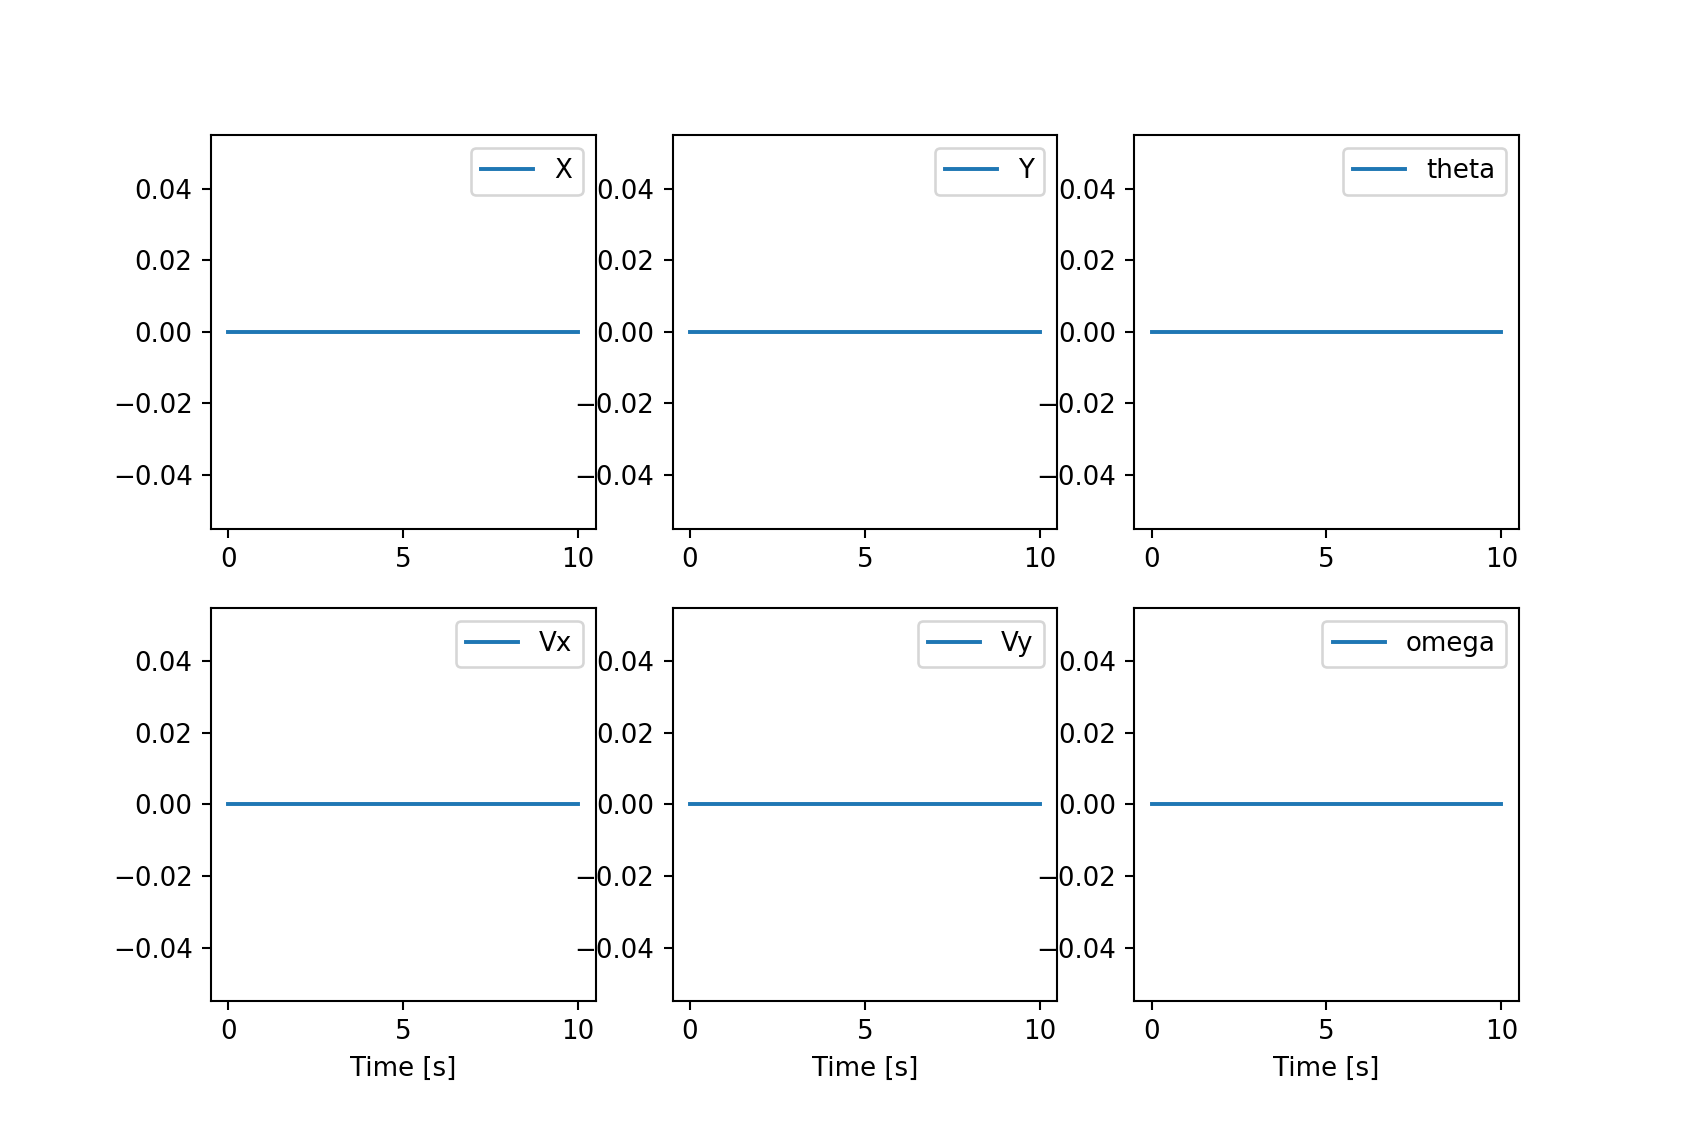

<IPython.core.display.Javascript object>


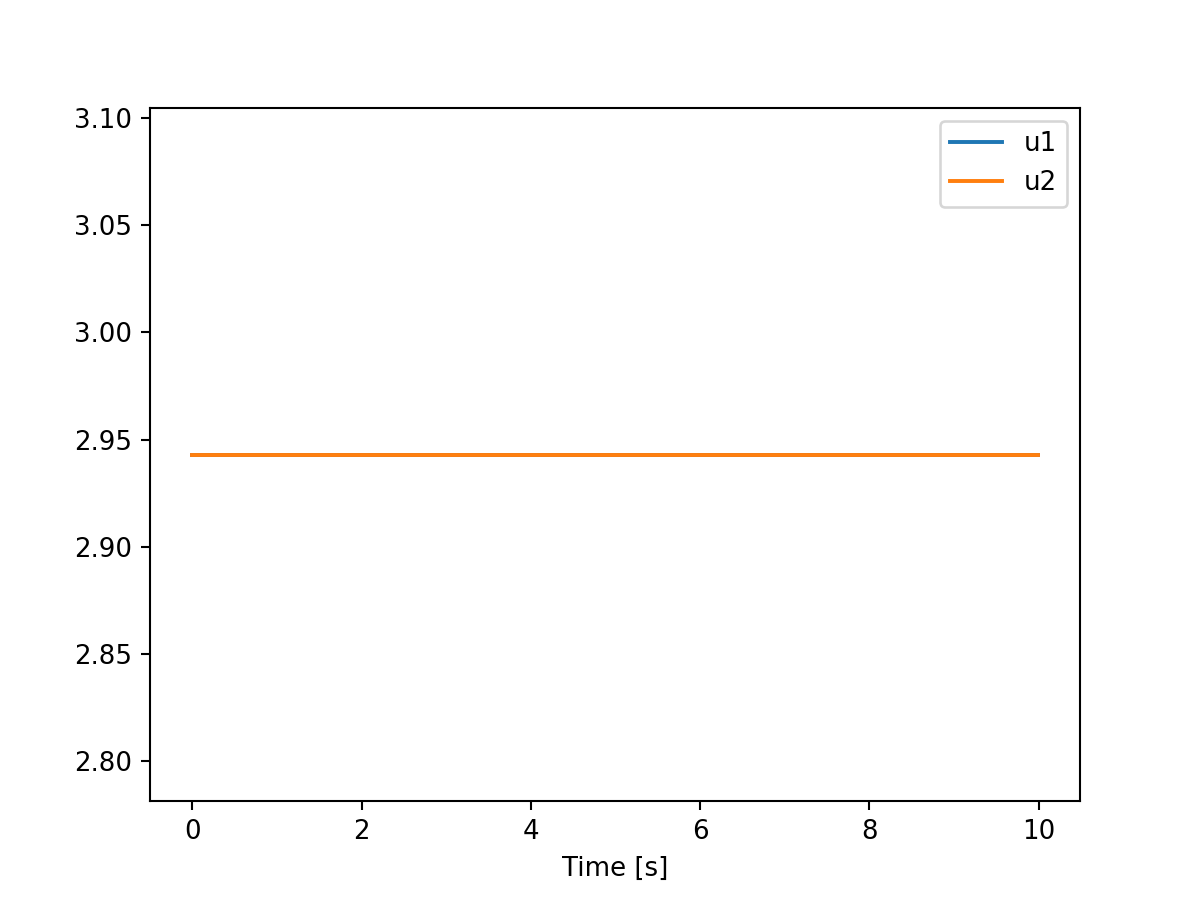

In [5]:
# we can plot the results
def plot_results(t, state, u):
    plt.figure(figsize=[9,6])

    plt.subplot(2,3,1)
    plt.plot(t, state[0,:])
    plt.legend(['X'])

    plt.subplot(2,3,2)
    plt.plot(t, state[2,:])
    plt.legend(['Y'])

    plt.subplot(2,3,3)
    plt.plot(t, state[4,:])
    plt.legend(["theta"])

    plt.subplot(2,3,4)
    plt.plot(t, state[1,:])
    plt.legend(['Vx'])
    plt.xlabel('Time [s]')

    plt.subplot(2,3,5)
    plt.plot(t, state[3,:])
    plt.legend(['Vy'])
    plt.xlabel('Time [s]')

    plt.subplot(2,3,6)
    plt.plot(t, state[5,:])
    plt.legend(['omega'])
    plt.xlabel('Time [s]')

    # we can also plot the control
    plt.figure()
    plt.plot(t[:-1], u.T)
    plt.legend(['u1', 'u2'])
    plt.xlabel('Time [s]')
    
plot_results(t, state, u)

In [6]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAI8JtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ExFliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLgux/cFr+bWrNZ8wQjIA2nto
M8qgwe9P1mMAq/sUFldfF/R3eDx1OfilN/UZA8ZGZ/K1RDJAaZokC0KEvXmbcF9vZO1bX7eDNJnV
LVGDgEflk8TbjPf2sX0Sg8Aui7KOr+2SyYDTGe+U6rY1BDudAbL74edZoy/ryN5kt8iymceQZguV
qIcfz7v+DFeSmmipttXMaRs4sCVTG4HceRynmjPBEUkSR99iiQAAAwAAAwAAAwAABTorZZQCtNrF
4n4UAjp4M6ULjVCsrd8do84DpOSHv8PDGxhp5uLpnP+1zdfT4CE1/7/D+MVytE3Jo844RwHPES4Q
8guy3QSV+MY/m/cAflfJcF9ztaJ2dgJmuxrBusupZObhCCgB1GAtXRTnnmL/zqQ06Ievjo3Dq2is
qTWvuY21n9P9d7r4Tv4SNkcb3QLJoQ9oZLeP/mZgeDcwDmtsSa88a6KwuA1lJYLVhWhNV4N450oZ
HgTZu1ZHqq/eoQ3FTKjyJkU3hsJXiyDvJVN8K/5DVbCsPtMSQDVEEkBty4dVj/wKv2DXJPnkk2KX
Y/8s1pdhQhDDd1u4DQA+TxccshQEoX3tkA2wXtoZjADHn+VdnhV6GhTjFwTxGGUsUzhymn534qei
3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIyIj19eUDlFyFtw3pyekKDi08JBBRD
MRi4zDlNLAUGix5NKFUO9Qbweox4ieU2dJzfl2Dqpd2M/sS5ruFrOWGZNNzRVL1mhhG/A8Uvi1+5
jTo3iINRmMhBuDtTvSxRFQcYTEONjUY4/5Zod+2K6jCJjbBlzbNkFsk3og8YD4KF4x8Mm93U0s4Q
/SjNdjDTe+dmz9b2ALFvV7bfP+9eAq/t6cluiBNQcO/jPWAAGE/X9JdgdFCzIhFEmdlAc97mVAuW
GTtkmwRgjNJUyUl56T5LKJK3SW6vD7BZIxTp6Tbdlj7i34474s4FzjjT4PrmIYJpjXYyjrZBJG4j
I4+ulIcvUyz+v5PrwTmGtvjHL31uRXZfMiwPmEptfzf1/khGJ3m+OsVBit8SxTlgWwzKmKvE+7+L
3/HdAQo7vNsEBuiGkOdGrHaIMdIbtFBaYuddBqj224qhf34Nx90cJxssBJTlpw/4lG2K1ZTg/d8H
AAAdY5qI7V+PIAACSt9nVAmbDQAsVfIbVSfR0SAsg19XfZirtNoFFdNBAoETPnlMN3AgXdS+iEyA
8G5QmaQNw5u8xVx11fF6J8RWwOxT02f8xQP1HU4T9s6Q0YkGPh/2daZsILKmNqM/Najyp4b6sfSq
VvIarvv71kBygYF6kDRqzx6JbPIuTzf7BUcOUl7+ICP8HAFFKRRTsxN9CwqxFfEpdKD2IT5ZJMJz
Iz9huce8O+D+wFxD9UxTM+tSL2LlfKOZVUY8UIu0UIO65CNyGAMA7Ov+xdxAPpIMuhg9TL7kcVNn
ybARUVfxlm7RPGYBfx51ueyEE7nQV1mg0UnD7AZ5YOPnTN4Aph8vCZiE/yi9Ief0foHrKc3OFtvR
Cx+1lkKpnra1t26XYrabD9jZrN4Vzuhx3wCqSxZmDY5QP35/mtvOIa3t2Y5jenxG61Q0FG3MpPij
n+hrAE5k4FPjR014Sr3SP4i7tEiZiwu3fZq9pJjIOo25NEpDRJp7bmw5RtLKu/YefqWD79ZCJnJ3
LGU9k8fKGwehdSYBZqcj1jBW9W8+wIPr54HkkQ1eutuV+kBzXrl/dRkMn26SRQ/svpYQ3GyO/s81
xCbpqTrPZrWZ898yb887QEWoRXod2mNidC444OrdLj5qT5DbeaBswXp8je1Vk9yhGOSCT8iND7js
AEAEGajE28RDo1lDlrkSOnFZqt1/zoPQCeUVNo20nPmnkbvnL63z6nzGXarlQuorDphazZkNzcWg
JqMp3S1urgxL9rYA+01fABhJ68E24QspWgibU+1XxGwxKogI8NumCUtn82gzVgAE8EUrM/HcYXRM
99LZL31g1QsdiV+LWaRnve9q8ylDkAKrSF/dEsuA2DRUGxxw4TK9BPifRhorHswMDsCUb9VFk6/I
id5onlOxreMyQYnn2P15rDhCrzk7FXtdf+7itandss75LGn8hgopnaVRpRhRFtkvB3pQ04Np0+XM
KWheoXotNo0y/CDIyxiKB

<IPython.core.display.Javascript object>


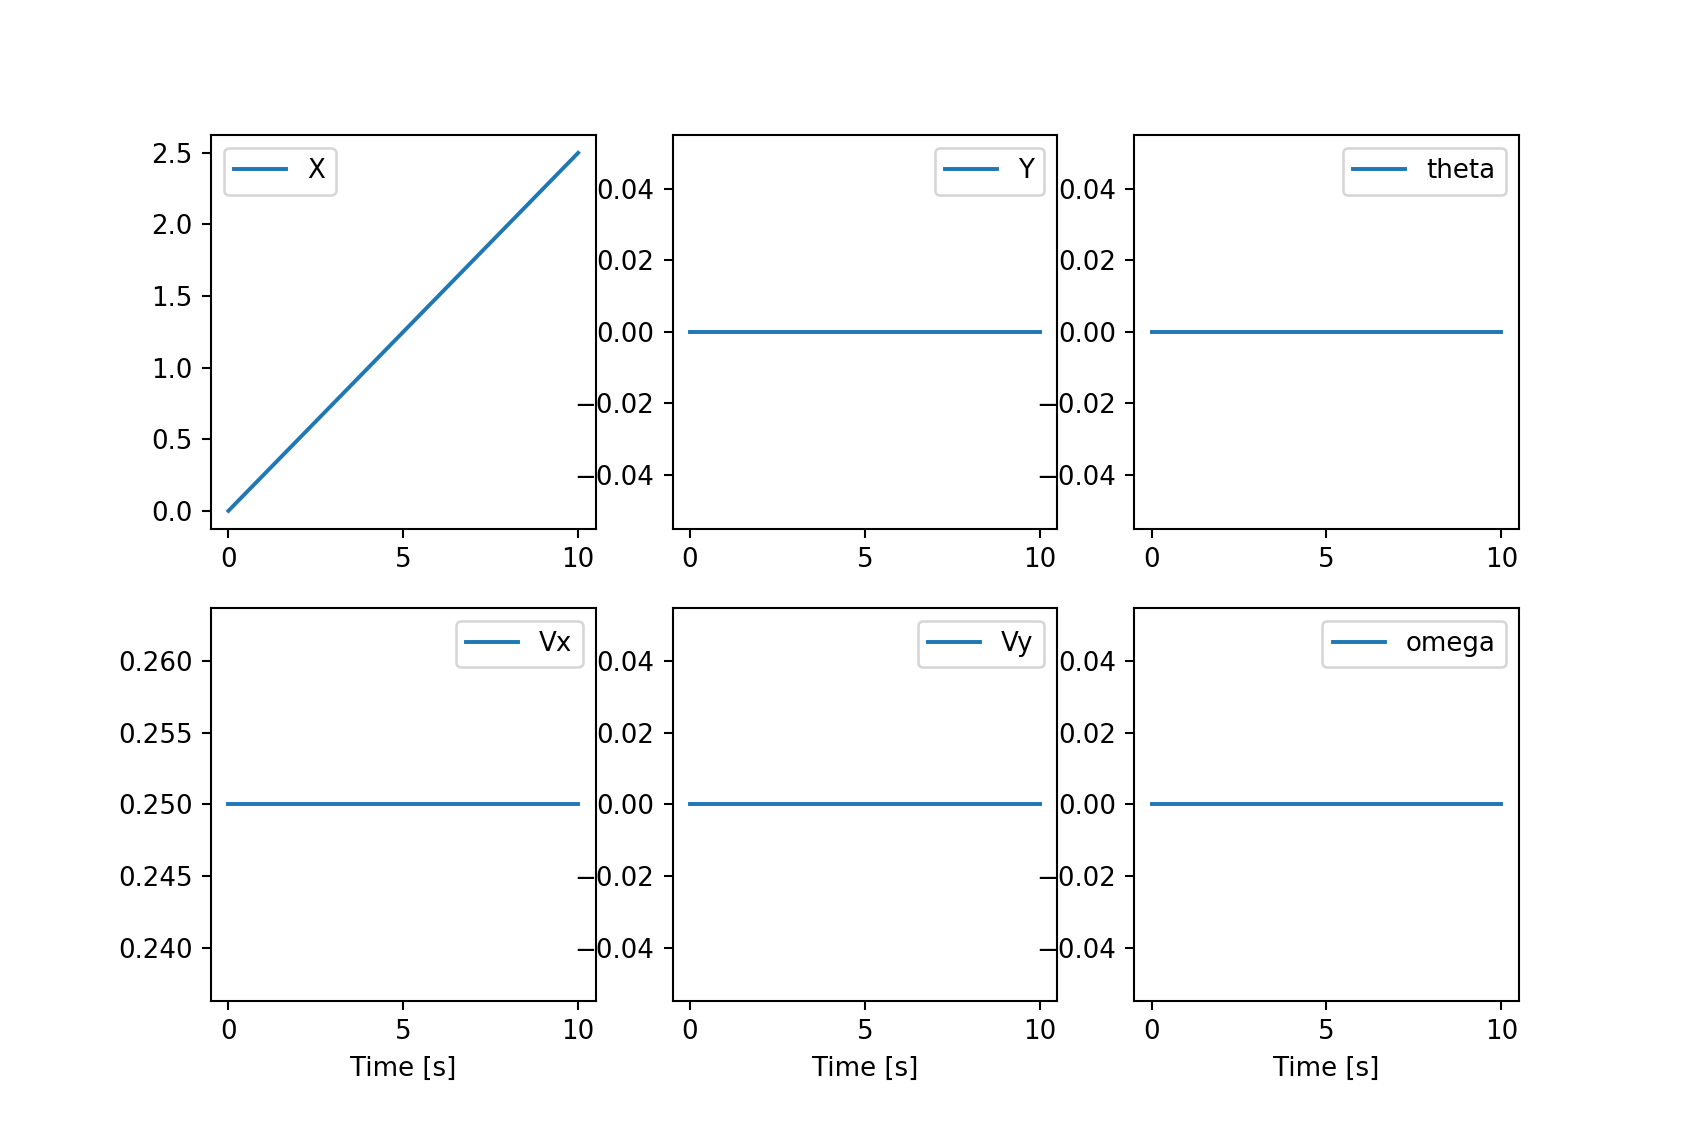

<IPython.core.display.Javascript object>


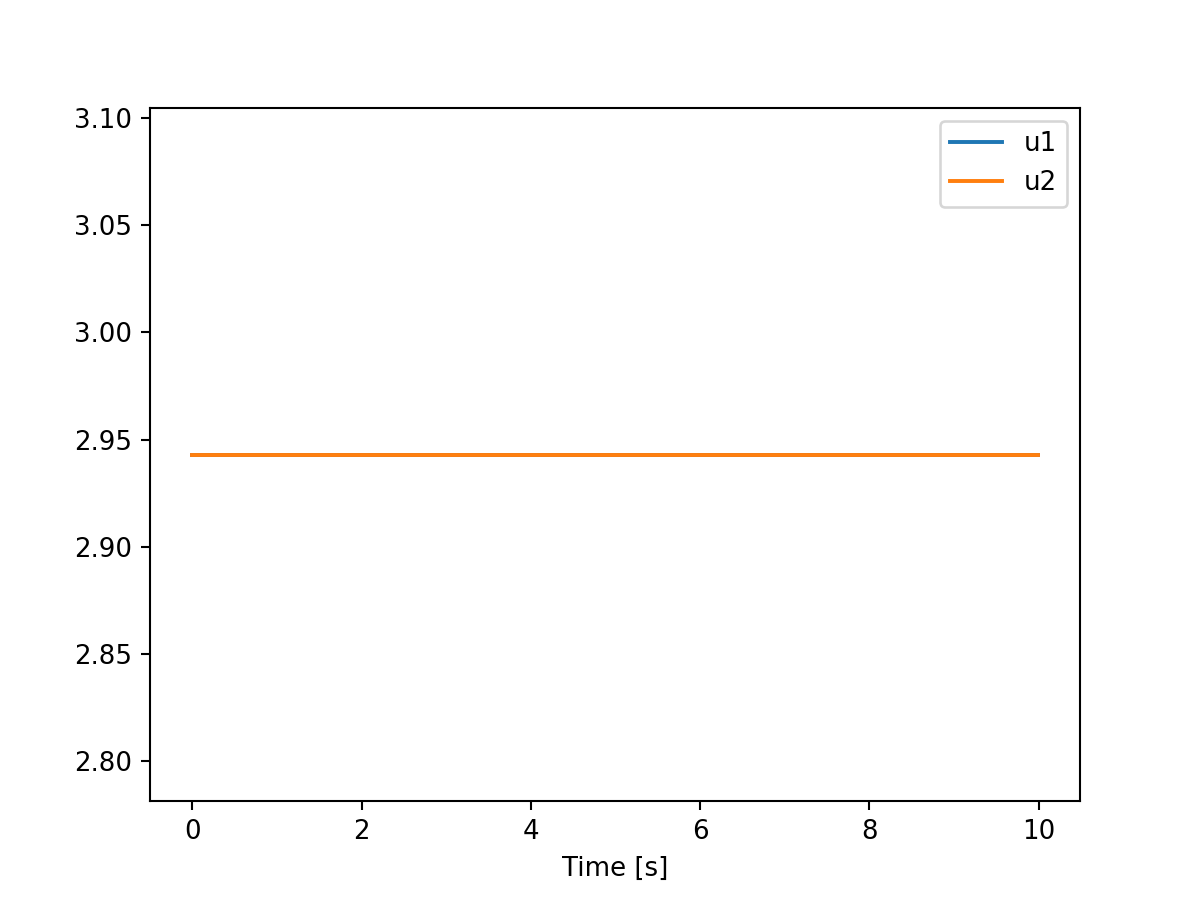

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAANwJtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ErBliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLgux/cFr+bWrNZ8wQjIA2nto
M8qgwe9P1mMAq/sUFldfF/R3eDx1OfilN/UZA8ZGZ/K1RDJAaZokC0KEvXmbcF9vZO1bX7eDNJnV
LVGDgEflk8TbjPf2sX0Sg8Aui7KOr+2SyYDTGe+U6rY1BDudAbL74edZoy/ryN5kt8iymceQZguV
qIcfz7v+DFeSmmipttXMaRs4sCVTG4HceRynmjPBEUkSR99iiQAAAwAAAwAAAwAABTorZZQCtNrF
4n4UAjp4M6ULjVCsrd8do84DpOSHv8PDGxhp5uLpnP+1zdfT4CE1/7/D+MVytE3Jo844RwHPES4Q
8guy3QSV+MY/m/cAflfJcF9ztaJ2dgJmuxrBusupZObhCCgB1GAtXRTnnmL/zqQ06Ievjo3Dq2is
qTWvuY21n9P9d7r4Tv4SNkcb3QLJoQ9oZLeP/mZgeDcwDmtsSa88a6KwuA1lJYLVhWhNV4N450oZ
HgTZu1ZHqq/eoQ3FTKjyJkU3hsJXiyDvJVN8K/5DVbCsPtMSQDVEEkBty4dVj/wKv2DXJPnkk2KX
Y/8s1pdhQhDDd1u4DQA+TxccshQEoX3tkA2wXtoZjADHn+VdnhV6GhTjFwTxGGUsUzhymn534qei
3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIyIj19eUDlFyFtw3pyekKDi08JBBRD
MRi4zDlNLAUGix5NKFUO9Qbweox4ieU2dJzfl2Dqpd2M/sS5ruFrOWGZNNzRVL1mhhG/A8Uvi1+5
jTo3iINRmMhBuDtTvSxRFQcYTEONjUY4/5Zod+2K6jCJjbBlzbNkFsk3og8YD4KF4x8Mm93U0s4Q
/SjNdjDTe+dmz9b2ALFvV7bfP+9eAq/t6cluiBNQcO/jPWAAGE/X9JdgdFCzIhFEmdlAc97mVAuW
GTtkmwRgjNJUyUl56T5LKJK3SW6vD7BZIxTp6Tbdlj7i34474s4FzjjT4PrmIYJpjXYyjrZBJG4j
I4+ulIcvUyz+v5PrwTmGtvjHL31uRXZfMiwPmEptfzf1/khGJ3m+OsVBit8SxTlgWwzKmKvE+7+L
3/HdAQo7vNsEBuiGkOdGrHaIMdIbtFBaYuddBqj3I3am17b5INHC4bRe1AwZsxocjdLb9VwfvSDg
AAOsc/kdq/PkAABJW+4agTNpoAWKvktQhXz8dtEZmurpo0s9rO/7jLnZqVs+zb0xHbGHFbxd9Q+H
iJmJnkoWjwVanguZEV32OetUFXvxRbkF1zsOzuHADUC4wzYASXOnWDl/ArmS6XYf9b+AaASqIzyY
ZPkb6qr758eUs2B8KsIh1v/qQb2uPc8RjibyiSn+u56a6foGQ1DXCDb+5hwkRAeEZJLhJFTlPB50
Y2VzMtTtkabb0Kl1l3DoB6pjEfTI9LPFiX/xSR6ud/yeRUvL8SScJ4BRndq4SAAOVvvINnwC0PKp
qj/l2wm4j3vEbC0YqlO1nSnq/LB11lUVQHzAD7eoweTZS0iC1jn58JppdFpTYtNlE29ELJ0QxdOj
QXD2vjZRRwd9s16l2rCGqqK8a0XnkQAxf3mpI9IW2gECtq940YDHKiTRGWDVo9NYixJptYHKyv3D
d/PoY/viLaZQdc1vWAyWCnlo7uV3nrTqy30joE36j97H3jyb9yt1Rni5zdhTJgCV0rfzZeCehYdq
VLgGXceOG8yyf9H3QDkyGaRCdfD7maOCZ3bhbXHOk3n5DarBe+XdjndS2/Y3qG013VdnXxb6u/Qn
e/UhH5/+gRpksvVW23cBdmKZMyKViukppxUfyysMry7oALZaqsXmeeufCadz32FMnsN16quUMzfW
RM4FwFxWmvKUAaaagGXUS2FlYog7KbvNLB+JnNyAhsDHj8ng4n9kGddBAUhbs1HJZoWnjth3gpqj
pYz5oIW1wvORUvd+u9G3GIqJz0sHO61hiKYTuM24aQd9BOmGbTBLlGlmEwPhrmD4zyxVhT2EOUBc
lEpYd7d1s10B7Lpco4HH1+RE7vG1VXsV4WZIMTz7HyrOUqq3R3D4H35P/bfm7DGjoPQXLML+rjN4
hQYolqo+7jYaN6oRii1U2+HQcSVi2jTgPGbUTz54hESAvAz51/OQK8ABWgPN/R5iiFdUnQGtb8WI
klpiAAEhjRfa5qCaGDvZe

In [7]:
# Verify Part1 question 3, we can use the same controller 
# If we give the dron a non-zero velocity in the x-direction at the begining, it will move in the direction and keep theta = 0.
z0[1] = 0.25
t, state, u = quadrotor.simulate(z0, part1_q2_controller, horizon_length, disturbance = False)
plot_results(t, state, u)

quadrotor.animate_robot(state, u)

## Part 2 - LQR to stay in place
Now that we have $u^*$ capable of keeping the robot at rest, we can design a simple controller that ensures that the robot stays in place even when pushed around by random disturbances (e.g. due to the wind). Our task here will be to design a LQR controller that keeps the robot at a predefined position. Since the dynamics is not linear, we need to compute a linear approximation of it.
1. Linearize the dynamics at an arbitrary operating point $z^*$, $u^*$ and write the linearized system dynamics using the variables $\bar{z}_n = z_n - z^*$ and $\bar{u}_n = u_n - u^*$.
2. Write a function ```get_linearization(z, u)``` that returns the matrices A and B given a state $z$ and a control $u$ (use the constants defined in the ``quadrotor.py`` module).
3. Using the linearized dynamics, we can design an infinite horizon LQR controller of the form, $\hat{u} = K \bar{z}$ to stabilize the resting point. Write the equations of the controller in the original coordinates $u$ as a function of $z$.
4. Design an infinite-horizon LQR controller that stabilizes the origin $z=0$ and test it using the simulator below.
5. Explain your intended design in the report, including the cost function and found control law. In particular, verify that it can handle perturbations by calling the ```simulate``` function with ```disturbance = True``` (when setting disturbance to ``True``, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state evolution and show the animation (include the plots in your report).

In [8]:
def get_linearization(z, u):
    theta = z[4]
    dt = quadrotor.DELTA_T
    drone_mass = quadrotor.MASS
    drone_length = quadrotor.LENGTH
    drone_inertia = quadrotor.INERTIA
    
    A_mat = np.array([[1,dt,0,0,0,0],
                      [0,1,0,0,dt * -((u[0] + u[1]) * np.cos(theta) / drone_mass),0],
                      [0,0,1,dt,0,0],
                      [0,0,0,1,dt * -((u[0] + u[1]) * np.sin(theta) / drone_mass),0],
                      [0,0,0,0,1,dt],
                      [0,0,0,0,0,1]])
    
    B_mat = np.array([[0,0],
                      [dt * (-np.sin(theta) / drone_mass), dt * (-np.sin(theta) / drone_mass)],
                      [0,0],
                      [dt * (np.cos(theta) / drone_mass), dt * (np.cos(theta) / drone_mass)],
                      [0,0],
                      [dt * drone_length / drone_inertia, -dt * drone_length / drone_inertia]])
    return A_mat, B_mat

#Solve the LQR Problem
def solve_LQR(A, B, Q, R, QN, N):
    list_of_P = []
    list_of_K = []

    list_of_P.append(QN)

    for i in range(N):
        K_i = -1 * np.linalg.inv(B.transpose().dot(list_of_P[i]).dot(B) + R).dot(B.transpose()).dot(list_of_P[i]).dot(A)
        P_i = Q + A.transpose().dot(list_of_P[i]).dot(A) + A.transpose().dot(list_of_P[i]).dot(B).dot(K_i)
        list_of_K.append(K_i)
        list_of_P.append(P_i)

    return list_of_P[::-1], list_of_K[::-1]
    

#Sovle infinite LQR for question 3 & 4
def get_part2_controller(z_star, u_star):
    # First we need to design the quadratic cost matrix Q and R
    Q_mat = 1000. * np.eye(6)
    R_mat = 10 * np.eye(2)
    
    # Then get A and B by linearization
    A, B = get_linearization(z_star, u_star)
    print ("A mat is: ", A)
    print ("B mat is: ", B)
    
    horizon_length = 1000
    P_mats, K_mats = solve_LQR(A, B, Q_mat, R_mat, Q_mat, 1000)
#     P = P_mats[0]
#     K_mat = K_mats[0]
    
    return K_mats
    
z_original = np.zeros([quadrotor.NUMBER_STATES,])
u_original = 0.5 * quadrotor.MASS * quadrotor.GRAVITY * np.ones([2,])
part2_K_mats = get_part2_controller(z_original, u_original)

# we can simulate the robot but we need to provide a controller of the following form
def part2_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """
    K = part2_K_mats[i]
    control_unit = K.dot(state - z_original) + u_original
    return control_unit



# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, part2_controller, horizon_length, disturbance = False)

A mat is:  [[ 1.      0.01    0.      0.      0.      0.    ]
 [ 0.      1.      0.      0.     -0.0981  0.    ]
 [ 0.      0.      1.      0.01    0.      0.    ]
 [ 0.      0.      0.      1.     -0.      0.    ]
 [ 0.      0.      0.      0.      1.      0.01  ]
 [ 0.      0.      0.      0.      0.      1.    ]]
B mat is:  [[ 0.          0.        ]
 [-0.         -0.        ]
 [ 0.          0.        ]
 [ 0.01666667  0.01666667]
 [ 0.          0.        ]
 [ 0.01333333 -0.01333333]]


<IPython.core.display.Javascript object>


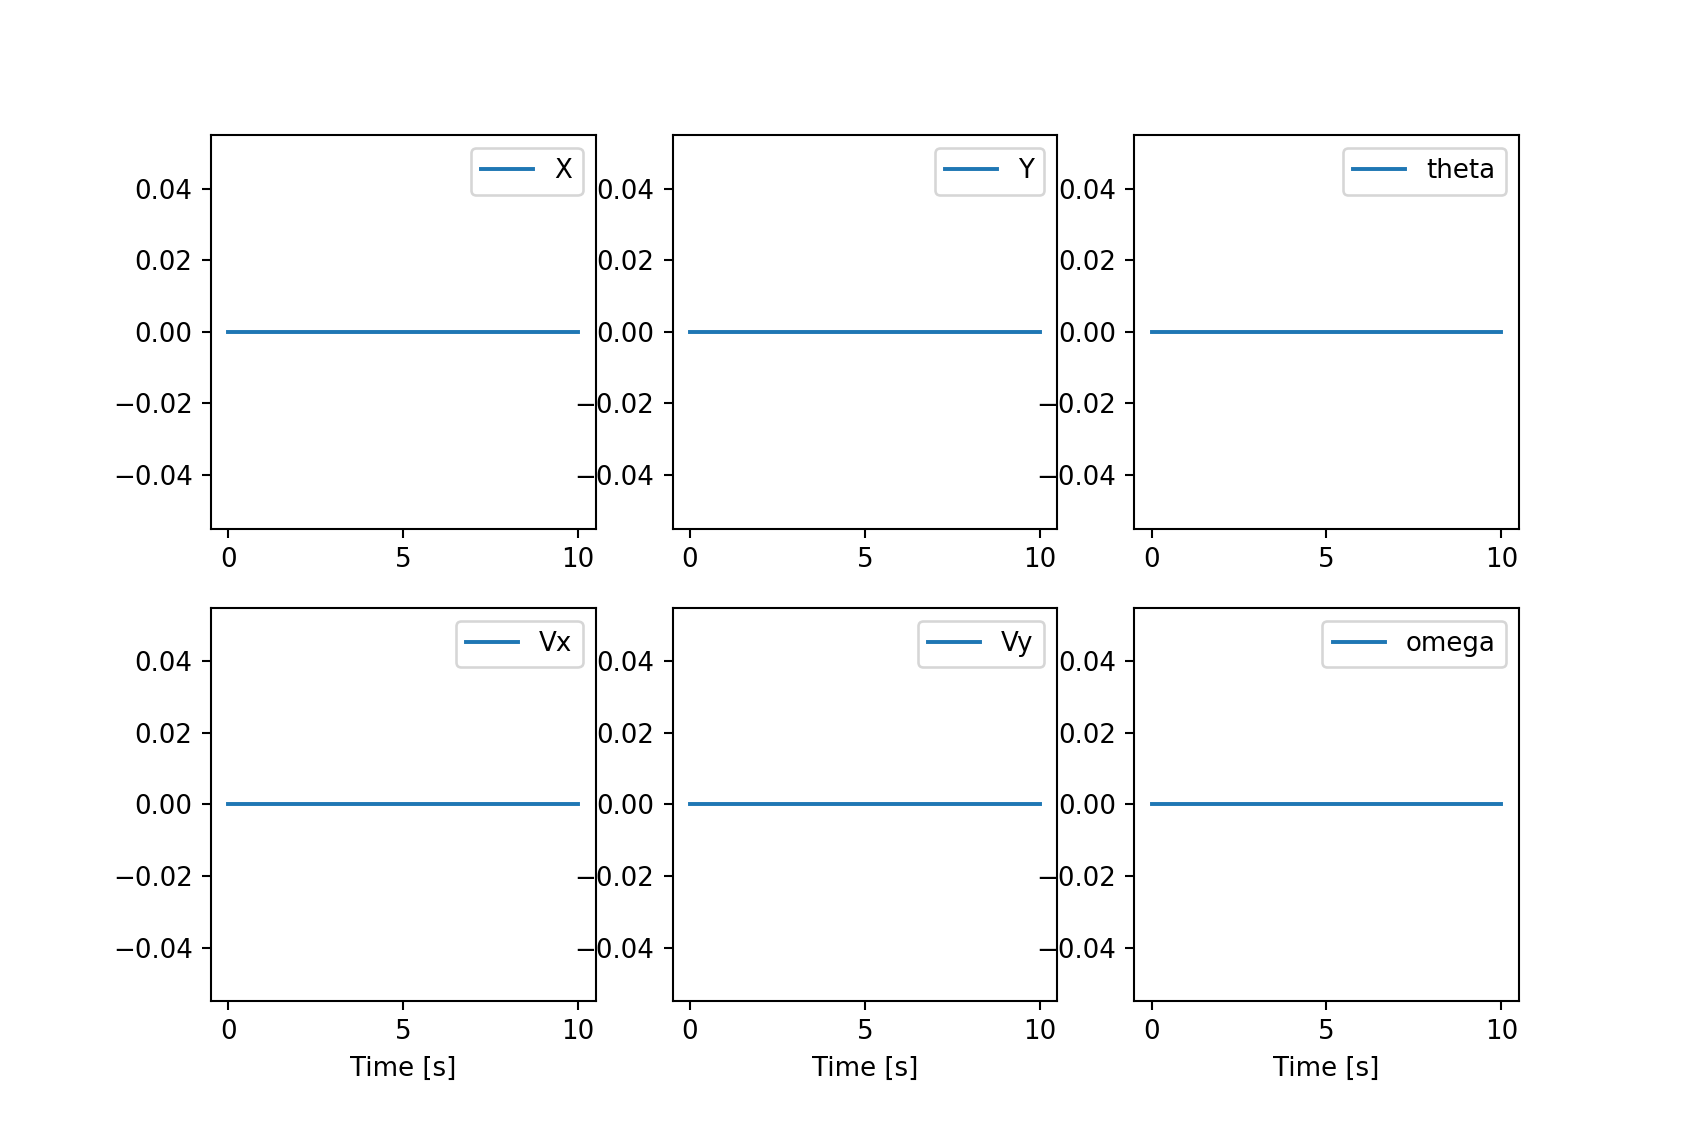

<IPython.core.display.Javascript object>


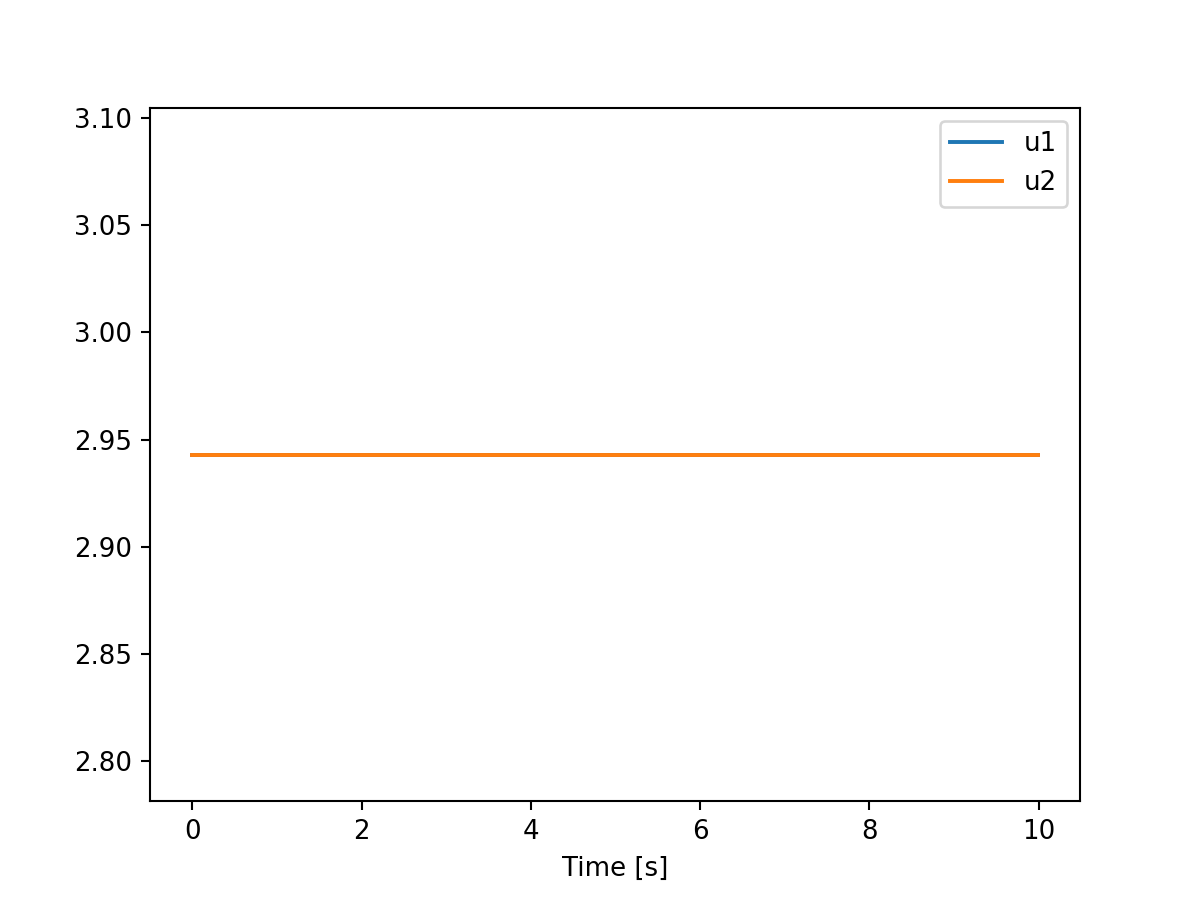

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAI8JtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ExFliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLgux/cFr+bWrNZ8wQjIA2nto
M8qgwe9P1mMAq/sUFldfF/R3eDx1OfilN/UZA8ZGZ/K1RDJAaZokC0KEvXmbcF9vZO1bX7eDNJnV
LVGDgEflk8TbjPf2sX0Sg8Aui7KOr+2SyYDTGe+U6rY1BDudAbL74edZoy/ryN5kt8iymceQZguV
qIcfz7v+DFeSmmipttXMaRs4sCVTG4HceRynmjPBEUkSR99iiQAAAwAAAwAAAwAABTorZZQCtNrF
4n4UAjp4M6ULjVCsrd8do84DpOSHv8PDGxhp5uLpnP+1zdfT4CE1/7/D+MVytE3Jo844RwHPES4Q
8guy3QSV+MY/m/cAflfJcF9ztaJ2dgJmuxrBusupZObhCCgB1GAtXRTnnmL/zqQ06Ievjo3Dq2is
qTWvuY21n9P9d7r4Tv4SNkcb3QLJoQ9oZLeP/mZgeDcwDmtsSa88a6KwuA1lJYLVhWhNV4N450oZ
HgTZu1ZHqq/eoQ3FTKjyJkU3hsJXiyDvJVN8K/5DVbCsPtMSQDVEEkBty4dVj/wKv2DXJPnkk2KX
Y/8s1pdhQhDDd1u4DQA+TxccshQEoX3tkA2wXtoZjADHn+VdnhV6GhTjFwTxGGUsUzhymn534qei
3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIyIj19eUDlFyFtw3pyekKDi08JBBRD
MRi4zDlNLAUGix5NKFUO9Qbweox4ieU2dJzfl2Dqpd2M/sS5ruFrOWGZNNzRVL1mhhG/A8Uvi1+5
jTo3iINRmMhBuDtTvSxRFQcYTEONjUY4/5Zod+2K6jCJjbBlzbNkFsk3og8YD4KF4x8Mm93U0s4Q
/SjNdjDTe+dmz9b2ALFvV7bfP+9eAq/t6cluiBNQcO/jPWAAGE/X9JdgdFCzIhFEmdlAc97mVAuW
GTtkmwRgjNJUyUl56T5LKJK3SW6vD7BZIxTp6Tbdlj7i34474s4FzjjT4PrmIYJpjXYyjrZBJG4j
I4+ulIcvUyz+v5PrwTmGtvjHL31uRXZfMiwPmEptfzf1/khGJ3m+OsVBit8SxTlgWwzKmKvE+7+L
3/HdAQo7vNsEBuiGkOdGrHaIMdIbtFBaYuddBqj224qhf34Nx90cJxssBJTlpw/4lG2K1ZTg/d8H
AAAdY5qI7V+PIAACSt9nVAmbDQAsVfIbVSfR0SAsg19XfZirtNoFFdNBAoETPnlMN3AgXdS+iEyA
8G5QmaQNw5u8xVx11fF6J8RWwOxT02f8xQP1HU4T9s6Q0YkGPh/2daZsILKmNqM/Najyp4b6sfSq
VvIarvv71kBygYF6kDRqzx6JbPIuTzf7BUcOUl7+ICP8HAFFKRRTsxN9CwqxFfEpdKD2IT5ZJMJz
Iz9huce8O+D+wFxD9UxTM+tSL2LlfKOZVUY8UIu0UIO65CNyGAMA7Ov+xdxAPpIMuhg9TL7kcVNn
ybARUVfxlm7RPGYBfx51ueyEE7nQV1mg0UnD7AZ5YOPnTN4Aph8vCZiE/yi9Ief0foHrKc3OFtvR
Cx+1lkKpnra1t26XYrabD9jZrN4Vzuhx3wCqSxZmDY5QP35/mtvOIa3t2Y5jenxG61Q0FG3MpPij
n+hrAE5k4FPjR014Sr3SP4i7tEiZiwu3fZq9pJjIOo25NEpDRJp7bmw5RtLKu/YefqWD79ZCJnJ3
LGU9k8fKGwehdSYBZqcj1jBW9W8+wIPr54HkkQ1eutuV+kBzXrl/dRkMn26SRQ/svpYQ3GyO/s81
xCbpqTrPZrWZ898yb887QEWoRXod2mNidC444OrdLj5qT5DbeaBswXp8je1Vk9yhGOSCT8iND7js
AEAEGajE28RDo1lDlrkSOnFZqt1/zoPQCeUVNo20nPmnkbvnL63z6nzGXarlQuorDphazZkNzcWg
JqMp3S1urgxL9rYA+01fABhJ68E24QspWgibU+1XxGwxKogI8NumCUtn82gzVgAE8EUrM/HcYXRM
99LZL31g1QsdiV+LWaRnve9q8ylDkAKrSF/dEsuA2DRUGxxw4TK9BPifRhorHswMDsCUb9VFk6/I
id5onlOxreMyQYnn2P15rDhCrzk7FXtdf+7itandss75LGn8hgopnaVRpRhRFtkvB3pQ04Np0+XM
KWheoXotNo0y/CDIyxiKB

In [9]:
plot_results(t, state, u)

quadrotor.animate_robot(state, u)

<IPython.core.display.Javascript object>


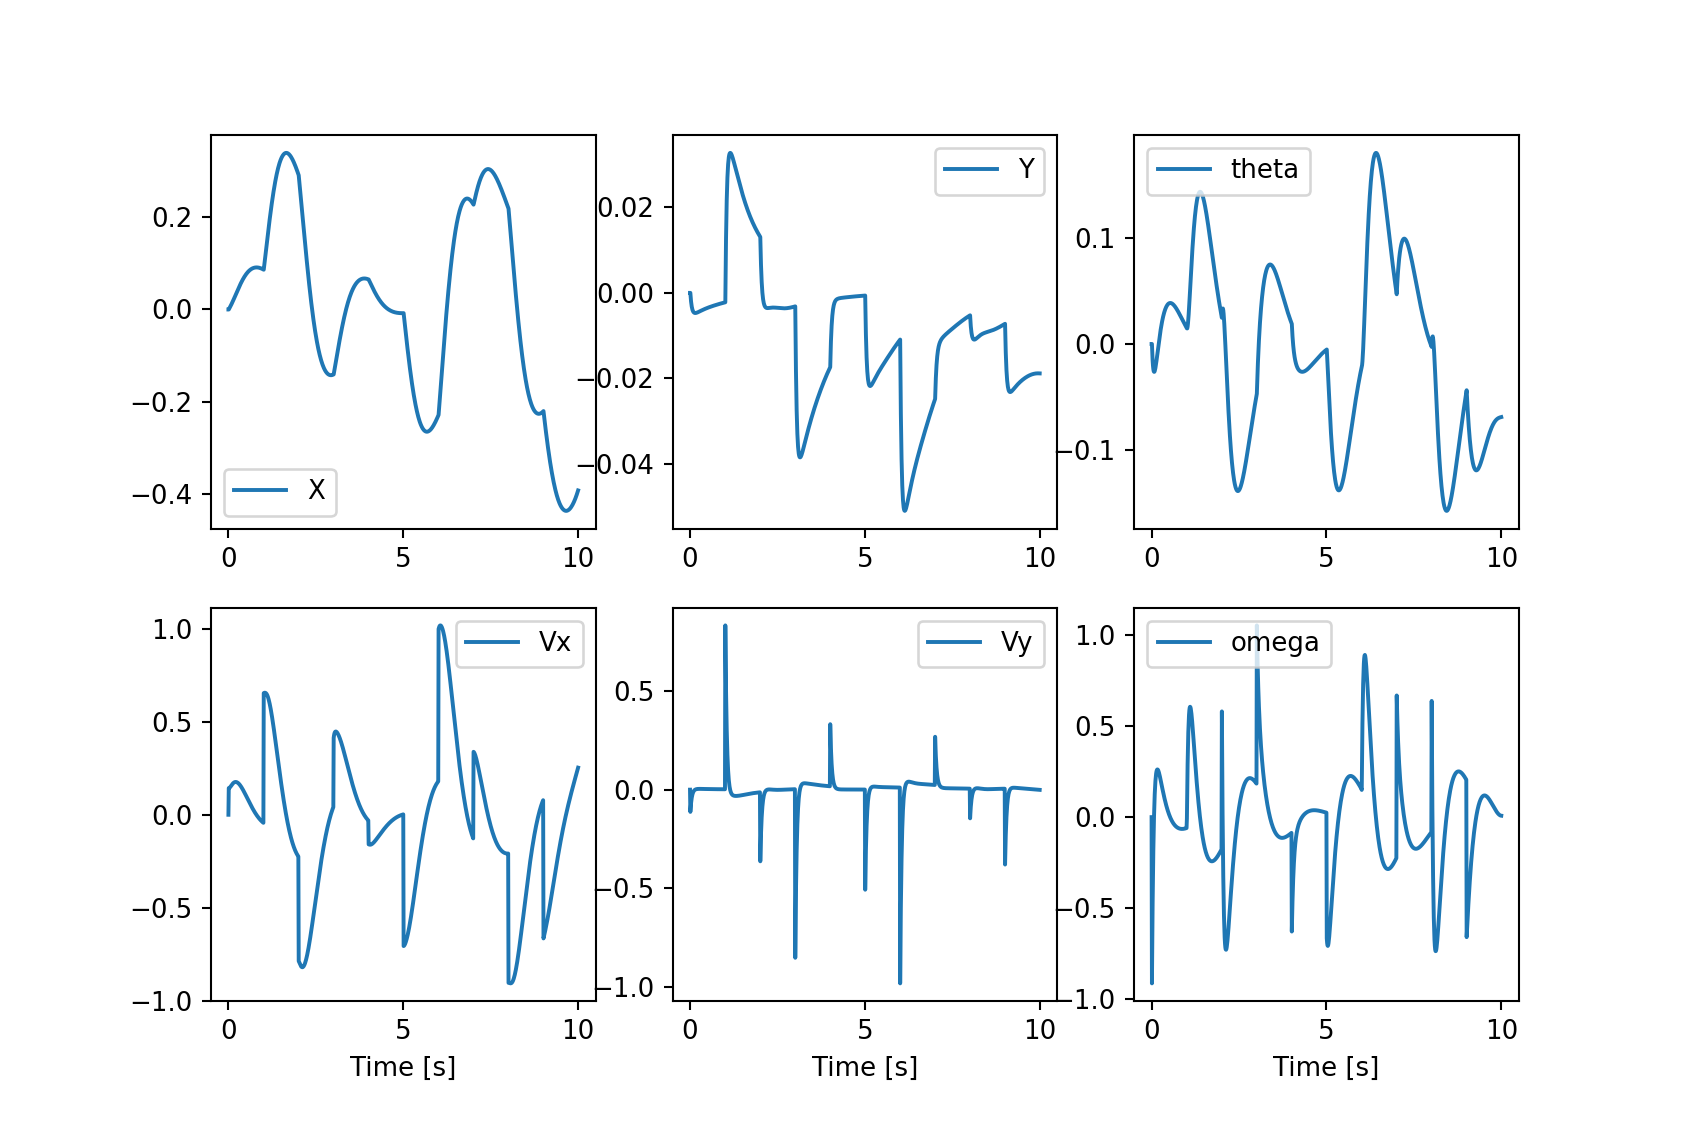

<IPython.core.display.Javascript object>


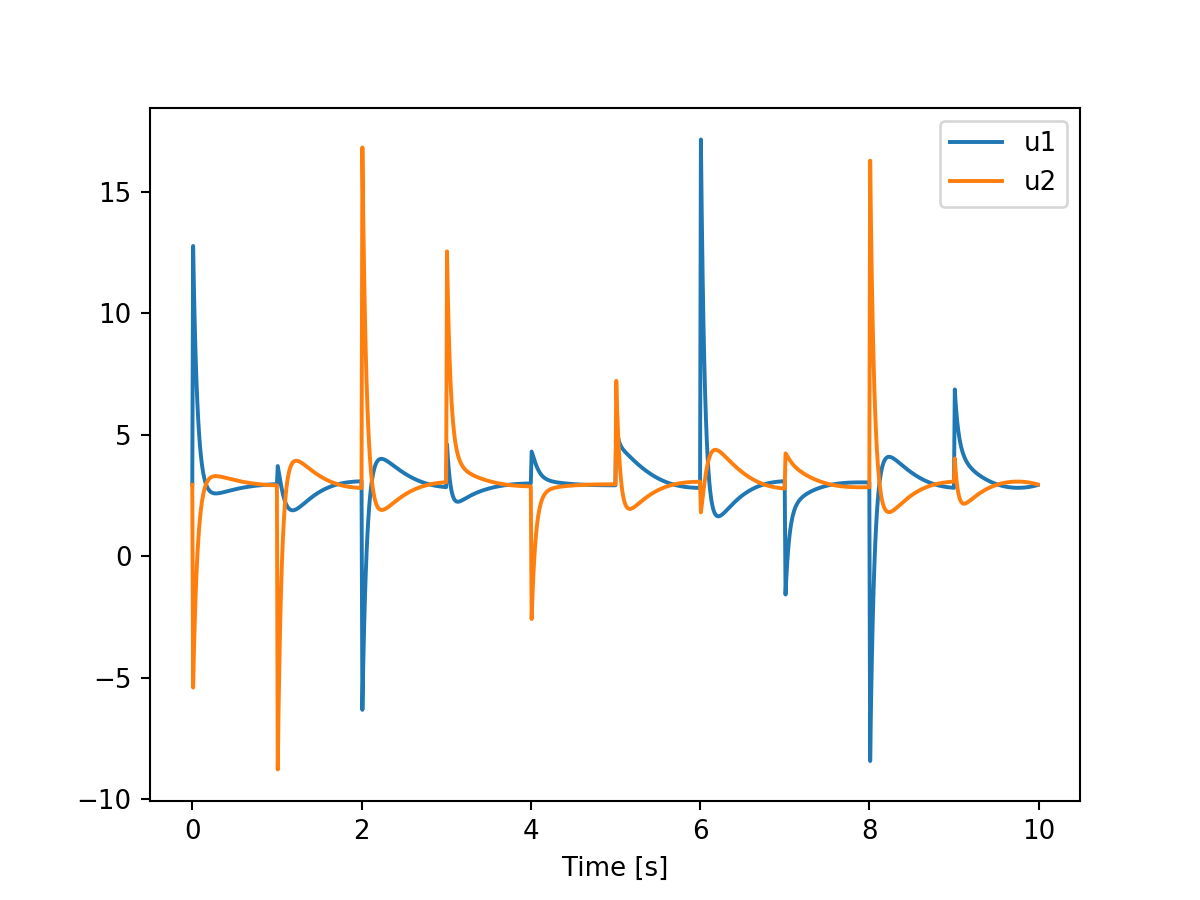

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAaTZtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EspliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLgux/cFr+bWrNZ8wQjIA2nto
M8qgwe9P1mMAq/sUFldfF/R3eDx1OfilN/UZA8ZGZ/K1RDJAaZokC0KEvXmbcF9vZO1bX7eDNJnV
LVGDgEflk8TbjPf2sX0Sg8Aui7KOr+2SyYDTGe+U6rY1BDudAbL74edZoy/ryN5kt8iymceQZguV
qIcfz7v+DFeSmmipttXMaRs4sCVTG4HceRynmjPBEUkSR99iiQAAAwAAAwAAAwAABTorZZQCtNrF
4n4UAjp4M6ULjVCsrd8do84DpOSHv8PDGxhp5uLpnP+1zdfT4CE1/7/D+MVytE3Jo844RwHPES4Q
8guy3QSV+MY/m/cAflfJcF9ztaJ2dgJmuxrBusupZObhCCgB1GAtXRTnnmL/zqQ06Ievjo3Dq2is
qTWvuY21n9P9d7r4Tv4SNkcb3QLJoQ9oZLeP/mZgeDcwDmtsSa88a6KwuA1lJYLVhWhNV4N450oZ
HgTZu1ZHqq/eoQ3FTKjyJkU3hsJXiyDvJVN8K/5DVbCsPtMSQDVEEkBty4dVj/wKv2DXJPnkk2KX
Y/8s1pdhQhDDd1u4DQA+TxccshQEoX3tkA2wXtoZjADHn+VdnhV6GhTjFwTxGGUsUzhymn534qei
3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIyIj19eUDlFyFtw3pyekKDi08JBBRD
MRi4zDlNLAUGix5NKFUO9Qbweox4ieU2dJzfl2Dqpd2M/sS5ruFrOWGZNNzRVL1mhhG/A8Uvi1+5
jTo3iINRmMhBuDtTvSxRFQcYTEONjUY4/5Zod+2K6jCJjbBlzbNkFsk3og8YD4KF4x8Mm93U0s4Q
/SjNdjDTe+dmz9b2ALFvV7bfP+9eAq/t6cluiBNQcO/jPWAAGE/X9JdgdFCzIhFEmdlAc97mVAuW
GTtkmwRgjNJUyUl56T5LKJK3SW6vD7BZIxTp6Tbdlj7i34474s4FzjjT4PrmIYJpjXYyjrZBJG4j
I4+ulIcvUyz+v5PrwTmGtvjHL31uRXZfMiwPmEptfzf1/khGJ3m+OsVBit8SxTlgWwzKmKvE+7+L
3/HdAQo7vNsEBuiGkOdGrHaIMdIbtFBaYuddBqj3I3am17T5IPwRZAFlblA8ZlJYdDctVi75QkMp
EAAVS89WbO/M4AABSa+qntaNkQAXKvkENZPrXzxiKCXLNPZOZt3KVQEz9oGt8IDMxkFcIsw3nynX
Jzjr2rrrPejCpU5eIVVa2aVe/5ByOji/D0X172zpBqzukbJUPZCaf8CYzD39B/mzNiWSQj8gkRn/
ETh2C2erfa9Tmz9klPM0gh/9SDe1x7niMcTeVIY/6/GWuneyInei8gXpbKh5OJDLr+3tL53oIMPO
qGyuZnPLZ46e4ZZNXtHdskZOum4ARQT0t5HDmV+uc/yWWqpe8SScJ4BSaPvsA5Gg/alYV1Hx8UJm
AX8fKuXq+XFy3hoxVKdrOlPV+WEKCVB4gUxI3YvYCfoVDaJq3vwGCmml0TlNi02UTb0QsnQG/gqH
zWSeM1ZkOw/4y/V5D0QEfwhYe3V9lbowYnIuFCikAXk5DhHfFr8+1NpVbiZgOfEThwwk9tTdaW4H
TWzBVbkPffqdOQeGcbk7hAlCXV94Nl7TMjZaKm7S+2EkCJa5d9M117NkfrAxqPSRVA3CEUGvFZmE
2L5jDruXf4/9GWBodzVRXTpTLqkScH4FXSdlx5seNgGBfM3Dy0PmwPWkjHC1PzD6/xe6jHeOyMv0
8yiJBEYeK4/nkP8iv9XJkWWB8BqD0J7vup0fmyda7lV1eOpTgqbbDXgjMVxy7WH4ohHjXNGjEG9i
xm8OHx/q4/LXYcXBftYwTpu6Eb7aqoMzcz84jrmRmhiTytdbMtxKLPXhrHw0swnU0VqyhIrwo/2W
jZNGkb1ABphenD3xb8CwPsZwoAKkS1fAf5ct31CecqIIgre/jgcfX5ETu/Tcs82QcVenA+r69l6z
94nHqVov/4yv/ibf3dvoa+mXHRTVBQtqyzUho1kNG9UIy5yhgE84emQ+mTSYaPuopcKLQlIzknlV
5gEWiBztZxLly51EZGTUG/53dXPX/QzYpWstGewFqS5VAV2qmEuAA9QCw2+99Yps2dH82wAAAwAA
AwCQG4PUV5IeBo7aIOy9y

In [10]:
t, state, u = quadrotor.simulate(z0, part2_controller, horizon_length, disturbance = True)

plot_results(t, state, u)
quadrotor.animate_robot(state, u)

## Part 3 - following a trajectory using linearized dynamics
Now we want to follow a given trajectory leveraging a linearized version of the dynamics to design LQ controllers.
1. Assume that we want to follow a circle of radius 1 centered at (0,0) while keeping an orientation $\theta=0$, how does the linearization of the dynamics change along the desired trajectory? Why?
2. Design a tracking controller (using an LQ design with linear approximations) to follow this desired trajectory. Explain your design in the report. 
3. Test the tracking controller with the simulation (with and without the perturbations) and verify that you can indeed track the (x,y) trajectory very well. Are you able to also track $\theta$? (Explain) 
4. Analyze your results (including plots of the states, controls, etc). What benefits and issues do you see with this approach?
5. Is it possible to do the same thing while keeping a desired orientation of $\theta = \frac{\pi}{4}$? What might influence the results in this case?

In [12]:
time_length = 1001
deltaT = 0.01
def get_waypoints():
    waypoints_on_circle = []
    
    thetas = np.linspace(0, time_length * deltaT, 1001)
    omega = 2 * np.pi
    for i, t in enumerate(thetas):
        k = i / 1001
        z_i = np.array([np.cos(omega * k), -omega / 10 * np.sin(omega*k), np.sin(omega*k), omega / 10 * np.cos(omega*k), 0, 0])
        waypoints_on_circle.append(z_i)
        
    return waypoints_on_circle

# Get the waypoints on the circle
part3_trajectory_points = get_waypoints()

print("part3 points: ", part3_trajectory_points[0])

part3 points:  [ 1.         -0.          0.          0.62831853  0.          0.        ]


In [14]:
def solve_LQR_trajectory(A, B, Q, R, x_bar, N): 
    '''
    A, B, Q and R are the matrices defining the OC problem
    x_bar is the trajectory of desired states of size dim(x) x (N+1)
    N is the horizon length

    The function returns 1) a list of gains of length N and 2) a list of feedforward controls of length N
    '''
    K_gains = []  # K_i

    list_of_P = [Q]  # P_i and P_N

    k_feedforward = []  # k_i

    list_of_p = []  # p_i
    x_bar_N = x_bar[N]
    qN = - Q.dot(x_bar_N)
    list_of_p.append(qN)  # p_N

    for i in range(N):
        # A B order is N - 1, N - 2, ... , 0
        K_i = -1 * np.linalg.inv(R + B[i].transpose().dot(list_of_P[i]).dot(B[i])).dot(B[i].transpose()).dot(list_of_P[i]).dot(A[i])

        P_i = Q + A[i].transpose().dot(list_of_P[i]).dot(A[i]) + A[i].transpose().dot(list_of_P[i]).dot(B[i]).dot(K_i)

        k_i = -1 * np.linalg.inv(R + B[i].transpose().dot(list_of_P[i]).dot(B[i])).dot(B[i].transpose()).dot(list_of_p[i])

        x_bar_i = x_bar[N - i - 1]
        q_i = - Q.dot(x_bar_i)
        p_i = q_i + A[i].transpose().dot(list_of_p[i]) + A[i].transpose().dot(list_of_P[i]).dot(B[i]).dot(k_i)

        K_gains.append(K_i)
        list_of_P.append(P_i)
        k_feedforward.append(k_i)
        list_of_p.append(p_i)

    return K_gains[::-1], k_feedforward[::-1]

def get_part3_controller(z_star_waypoints, u_star):
    # First we need to design the quadratic cost matrix Q and R
    Q_mat = np.array([[1000,0,0,0,0,0],
                      [0,1000,0,0,0,0],
                      [0,0,1000,0,0,0],
                      [0,0,0,1000,0,0],
                      [0,0,0,0,1000,0],
                      [0,0,0,0,0,1000]])
    R_mat = np.array([[0.1, 0],
                      [0, 0.1]])
    
    # Then get A and B by linearization
    A_mats = []
    B_mats = []
    horizon_length = time_length - 1
    
    for i in range(horizon_length):
        A, B = get_linearization(z_star_waypoints[i], u_star)
        A_mats.append(A)
        B_mats.append(B)
    
    K_mats, k_feedforward_mats = solve_LQR_trajectory(A_mats[::-1], B_mats[::-1], Q_mat, R_mat, z_star_waypoints, horizon_length)
    
    return K_mats, k_feedforward_mats

z_original = np.zeros([quadrotor.NUMBER_STATES,])
balanced_force = 0.5 * quadrotor.MASS * quadrotor.GRAVITY
u_original = np.array([balanced_force, balanced_force])
part3_K_mats, part3_k_feedforward_mats = get_part3_controller(part3_trajectory_points, u_original)

def part3_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """
    K = part3_K_mats[i]
    k = part3_k_feedforward_mats[i]
    control_unit = K @ (state) + u_original + k
    return control_unit


# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
# z0[0] = 1
t, state, u = quadrotor.simulate(z0, part3_controller, horizon_length, disturbance = False)

<IPython.core.display.Javascript object>


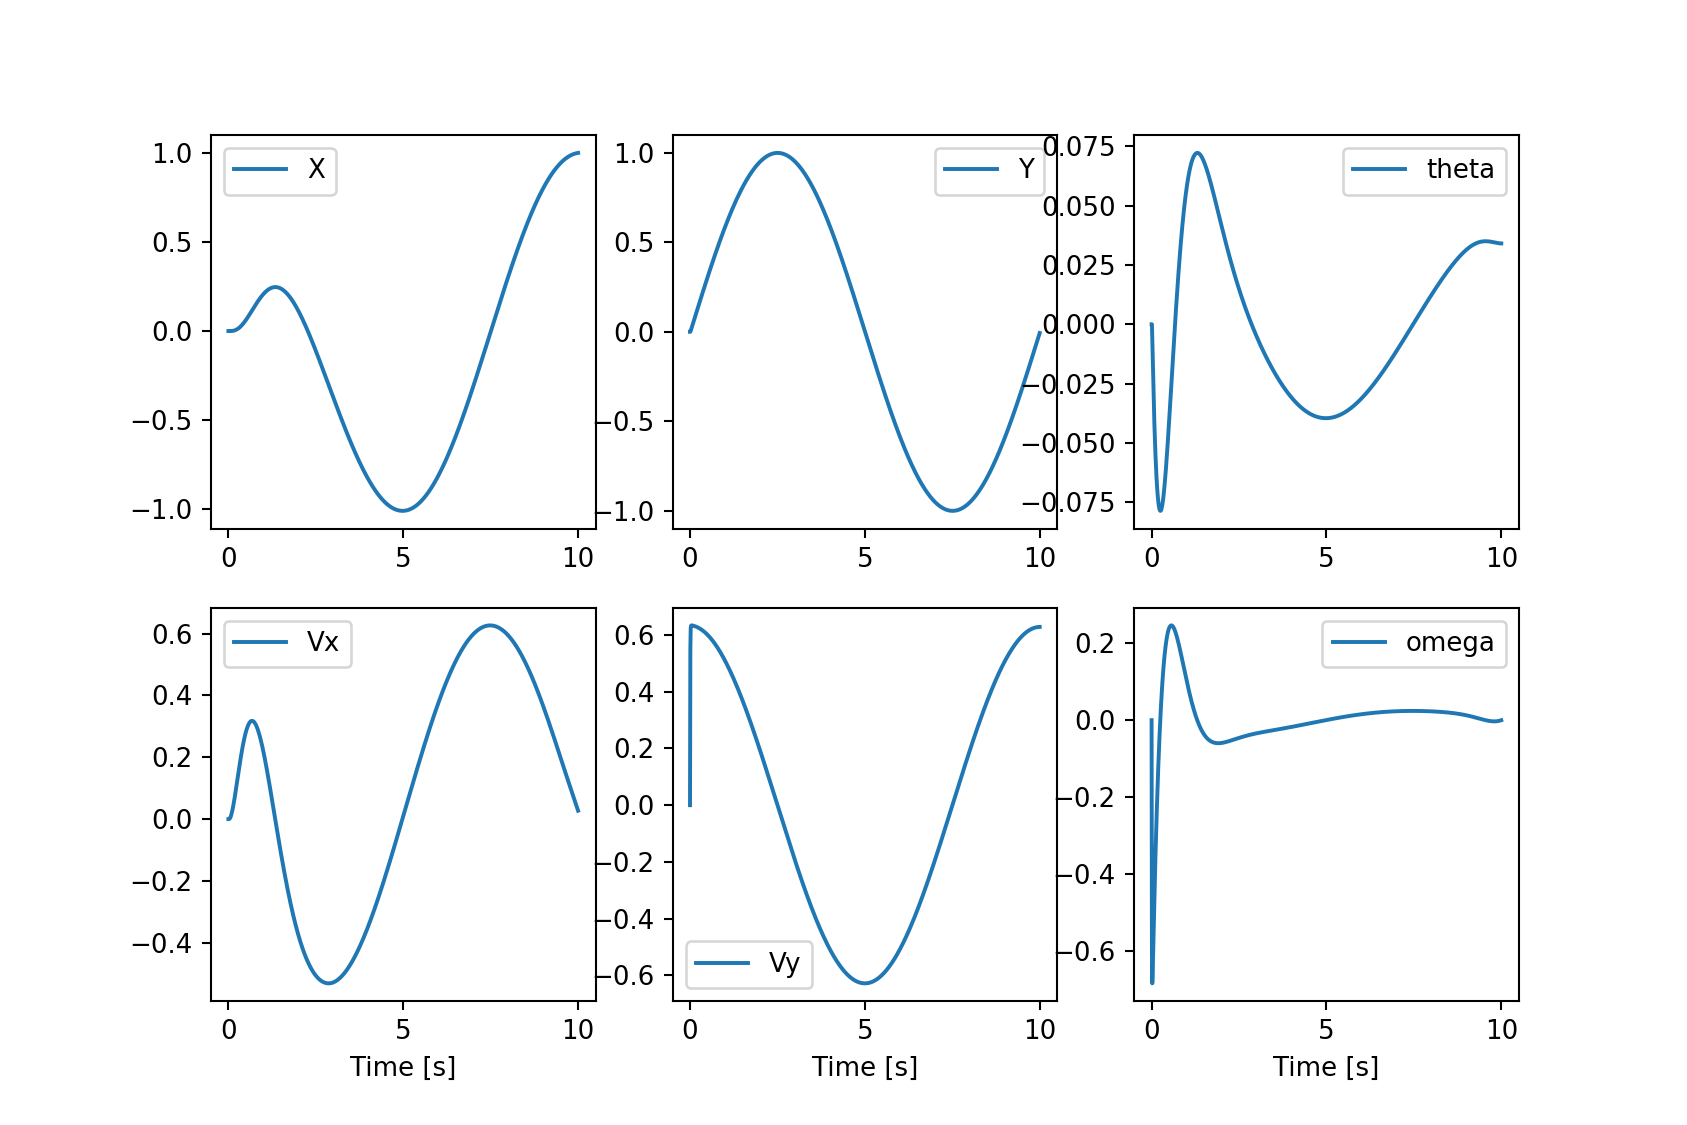

<IPython.core.display.Javascript object>


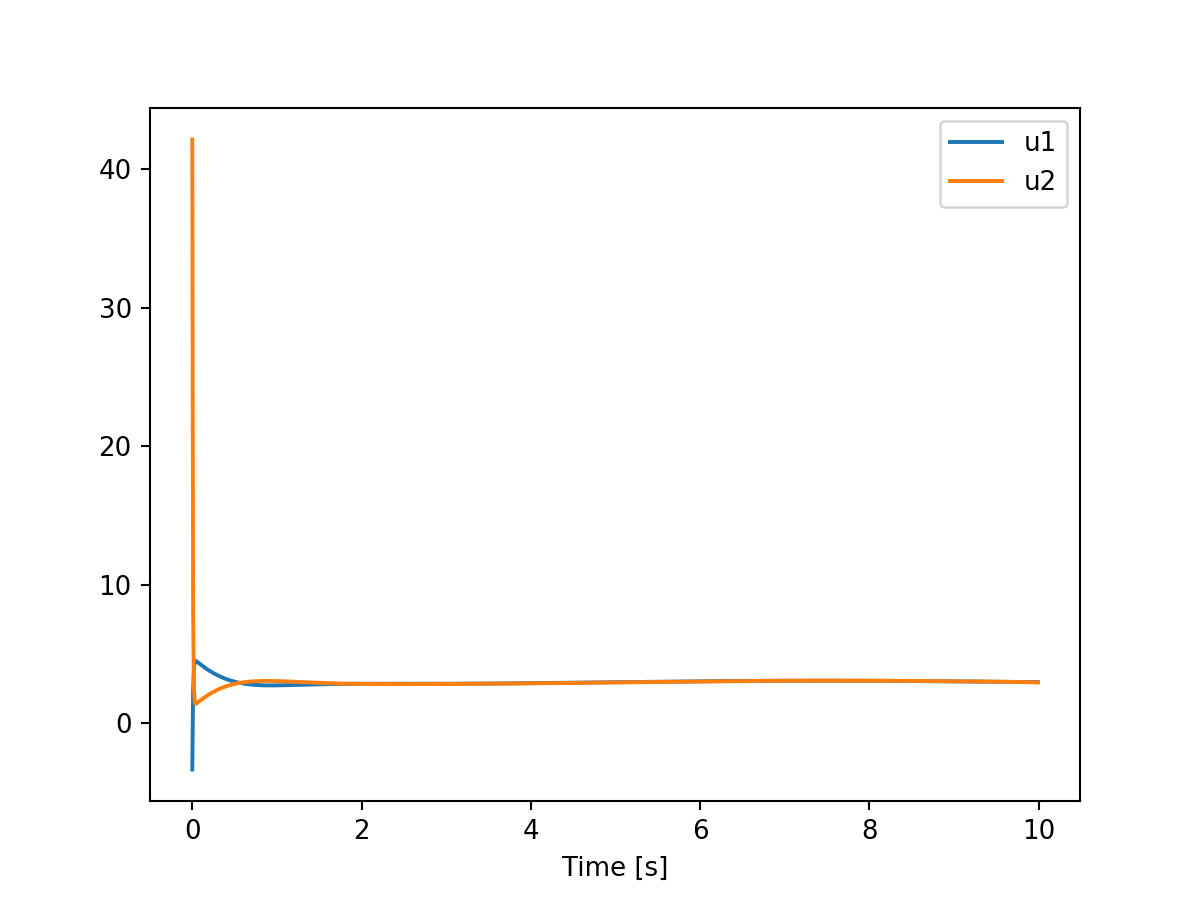

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAZnJtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
Eh5liIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejsj2gZ
MFMLKBcJkjXVkvHvH6xWuDDq3jCLMfOhTIvzmnGdaE/vYVZrpQqE5tWlH1wLzpsCVXhaMhwyKlIH
YXCzI57hRhGXk5AJs78hcXL0gEDWc/RFa7OFV/kuFKHj+kqM4DOAC+AogC3TkRHo8j5JpTvKiQM4
nLDD+XAg9NeD6W8cce2l/FR62IVTJaZmpZXtWP3P3BP8Aty1kv38ceunYStFyA/05L8hPnpct8Gw
CWlzTtbCvTReEHJz1a5gtpTABNPy+/tCuvMR6NespWG0p7CyRuLmGbFrumaxNIkG9KkVnPRNmHgd
6Nja5fMRXL/KzUgue9AcU+4R5HefIieerLQoi6JWGfJk0U/M/4r+bVg79kx5/PZG/sILjtN5szgX
rQz/WnfjQ7G8jwb/qmYy5vWFckeSY4VMYhNRuYScArN2fIsZMCXb0XGg7YHGcQIA/Cm8jVoVp0xW
QCyQcqI3I1+R6TYXHFvlP8O7nutpaSvJGRZBGRESYPl1kmtyyj0OCSyAesQkIYmK5Wohx/QL/5g0
z8tyv0M9t60Q5xX3YgywfC8jlPNLcKIamAAAAwAAAwAAAwAAJ/FbLKAVptLJFS2gEdPBnShcaoVl
bwHxDhgdJyQ9/h4Y2MNW9xdM5/2ubzcZU4qT/f4fxiuVopOfV41v1QAj+SaIZx9eC1SvxjH837gD
8r5LgvudtRBJ1kMxjvDEhEKF6R64QBD9/wdLEcsb4X0D/+q6zL0Gxwhe0eBKEK2iNKOqP1YP8M+N
WOso0Cz9V6bglrjIucId2fJvH/zMwPBuYB7IjDNeAxegRCgQdsshoywVhM95n450oZHgTZu0Mbt0
zdDgbfhzWZEyKbw2ErxZB0syu+0m0hqeNwX2mJIBqiCSA2vkq4L/5FYgDTQnzR2uIxwZ+Wa0uwoQ
hhu7wpUSAfJ3G8BiLA04C7ZANsOraGYwAx5/lTZOPy77JxLESm52N8+wdyZz6SoGKY8fwAAAAwAA
AwAAAwAMg2xz0y7vlDlFyFtw3pyekKD4d8JBBRDMRi4zDxjLAUGix5NKFT/zcpQ9Rn+6cJs6Tm/L
sHVS7/DZTS962no9rsn0PoywqU4NY04i1/WzeWmqwkFGd3RhojIQb85D6bBQL6LLKXMjJyAnFunl
LjwHyYwiY2wUproBBbJN6EZ8WwHwVtS3Xryx3W6Eodm6405H3mcm0904FxqLhpyEKA6iQcVNVAr4
dxsy8SK3OBm4Xa3UxW+cqgaMZIz8r4Vj74tOyjqzkz3oh1BnjsUxDco/8L5j4TOu90mmjqBpTEKD
s5F0ZWvP3cNWRjo15smihK2wZJwmx9DexjsMKWEU4vORr3A8KTIRG6Ao4v8AIPxsYvE4IisYPzLm
829ZFXulicYdZOMyHM0DgbYUUeLUWMpYgk+L7EjTFXifd/F7/jugITV3m2CA3RDSHOVvfYMAZvZu
3vrp4agdA0DQ0sGatgo/SCrtTWF5Nji2OcYl/56qKd30G717AAADAC6AAAADAHo12bpJlfxsque7
QpAWKZ8M7EohzUdyjhGDNasAsbVhMIRDD6v/pnz48pZsD4VYLIsUC5Bva49zxGOJvKUFn8rSANv+
uI3UNzX462VHztxOFgtwFO5aRupnw/ZltPmtL7l/fuCs7z2cbuMgvYO2o/o3AjPaefBy47Wt/Kv1
FfNH9u49wVGNYZKprpRwrqVuhCN5qP+UIdd20vl/THjFUp2s6VIXatU+N7ieBhyz0W6zd61o+taE
VrHPz4TTS6NPdPhek3+yIzTJXtmlqP+GhUSeO4CFGWw2WFwL9PuW/AUx7Tu4pjgPHfrMkFQ09fmz
RREh82xcVMDhXymsXNJ+jN34c60as9js56gPkp8CJf9KyWRruQoedFXoW1PVWuiF+pnd09OetXPQ
eENJbrIrg7LAu4BZ3M8tdTy1hwXXm1L+ImU581wIQD0uz02oUBZOsetY9cURHsOfkc2h7DewROG6
z/XKYvrfR37c01qFamdzG3ZvbFHNvGgatRrCLcGnxsujvAN7KpjZfpdLu+cb0lHpOcpb9f9GuY8P
FkLRna3uB3f7Eq08LFq/YO7x062tsfJWmzV/VJysSAjS5SKzFTgjrrepIO4827Fj9Gr1uh0Zu4mK
FMB9iwnUbaBIw2h7CAd3rMBREG9MCn1upSn1oCd4trJccKnF52TjMOzGpR6hPLlQC0gp0utC/aUP
dAdDuTYKzkjZkgxPPsezdicx0XHPD3+S3/3FR1XMYJN8JzOPya538OaQMmNho3qhGXONRhXKFZP2
1CbvrIu1+BO8Y5n/TWo66PITugY5pDw6iy1/6dlyGYHFSWZjwuMYPtrWGJrGCBxUq6se7s7npOn0
nUCOrE25E5i5eeU6SFLFPP2d4IAAEzVfRXD8LBWNDG3kvUAAAAMAAFQo5PiVcrzL0VJZ5JETAbY6
OSJHKJDcnHnqNA8L+XC/DUcSyYBqbHEv+FIJni/Qw53zD3f2gm2AvsXbMnOfXg6Xq/heoJZWSzlL
MRTfFRiqjzYw+/LsPtfrI

In [15]:
plot_results(t, state, u)
quadrotor.animate_robot(state, u)

<IPython.core.display.Javascript object>


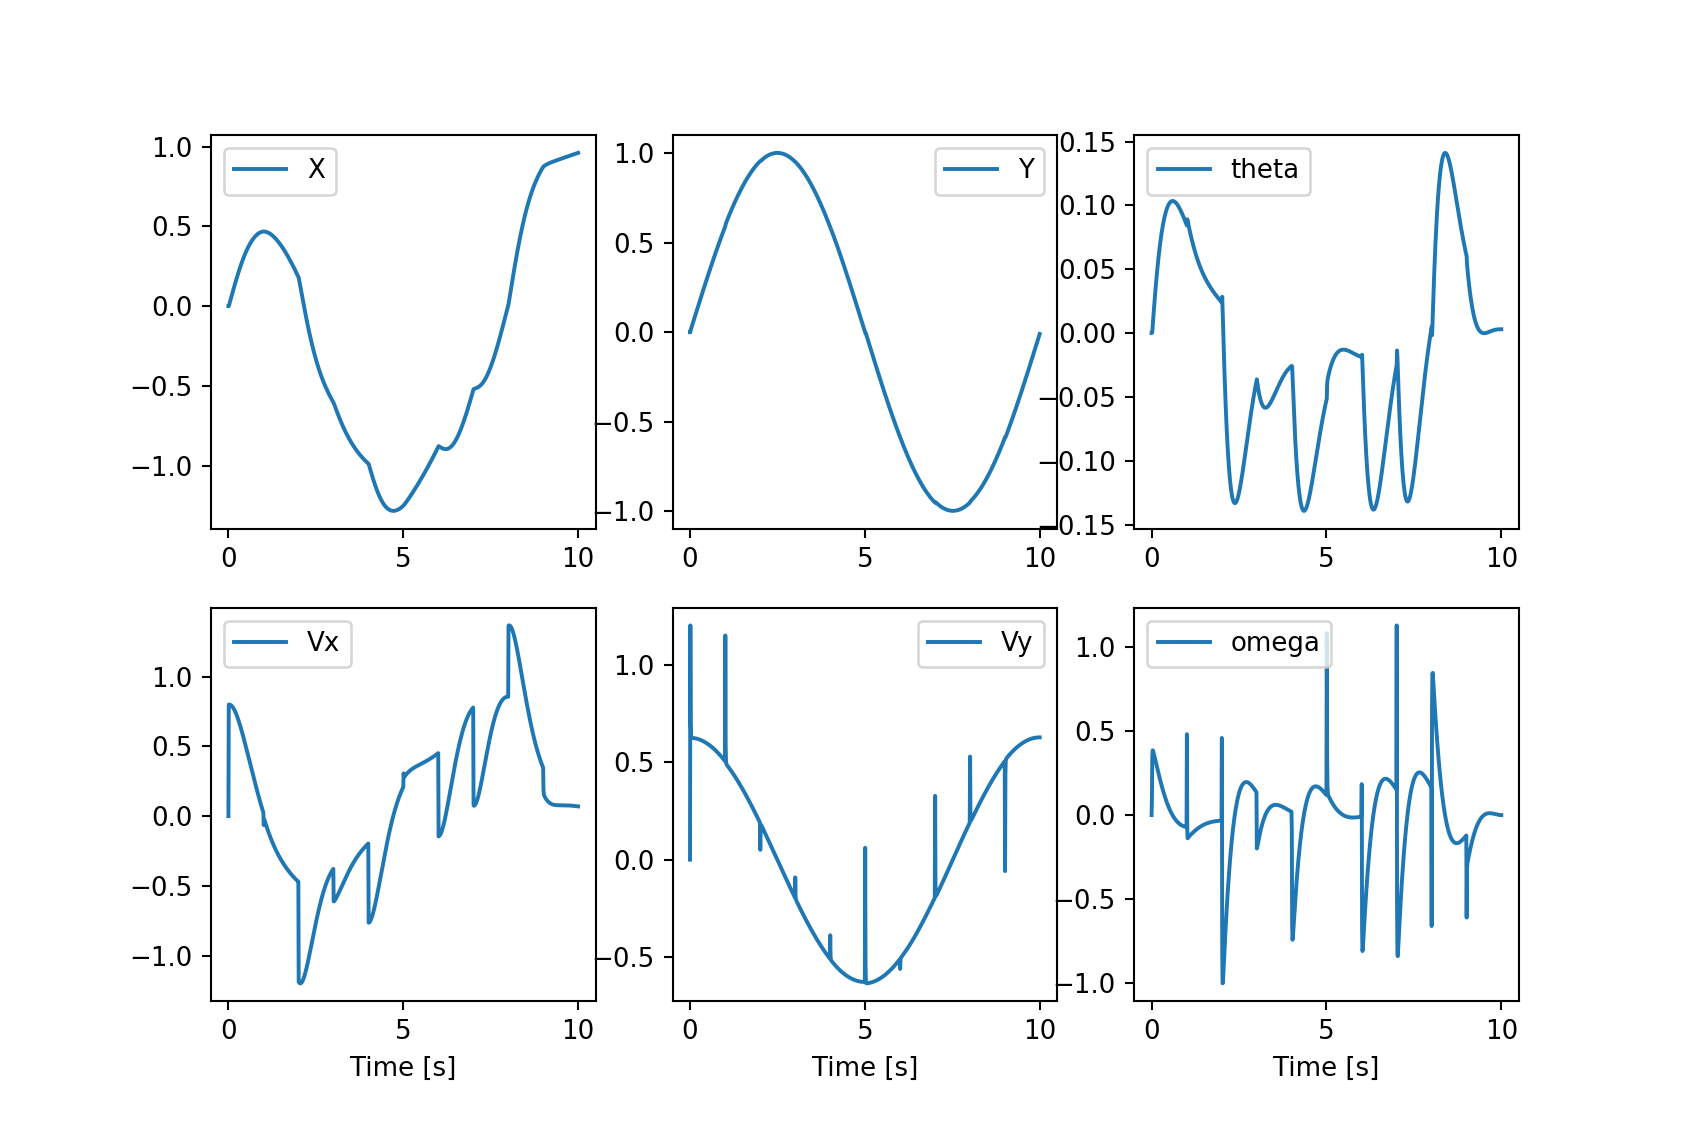

<IPython.core.display.Javascript object>


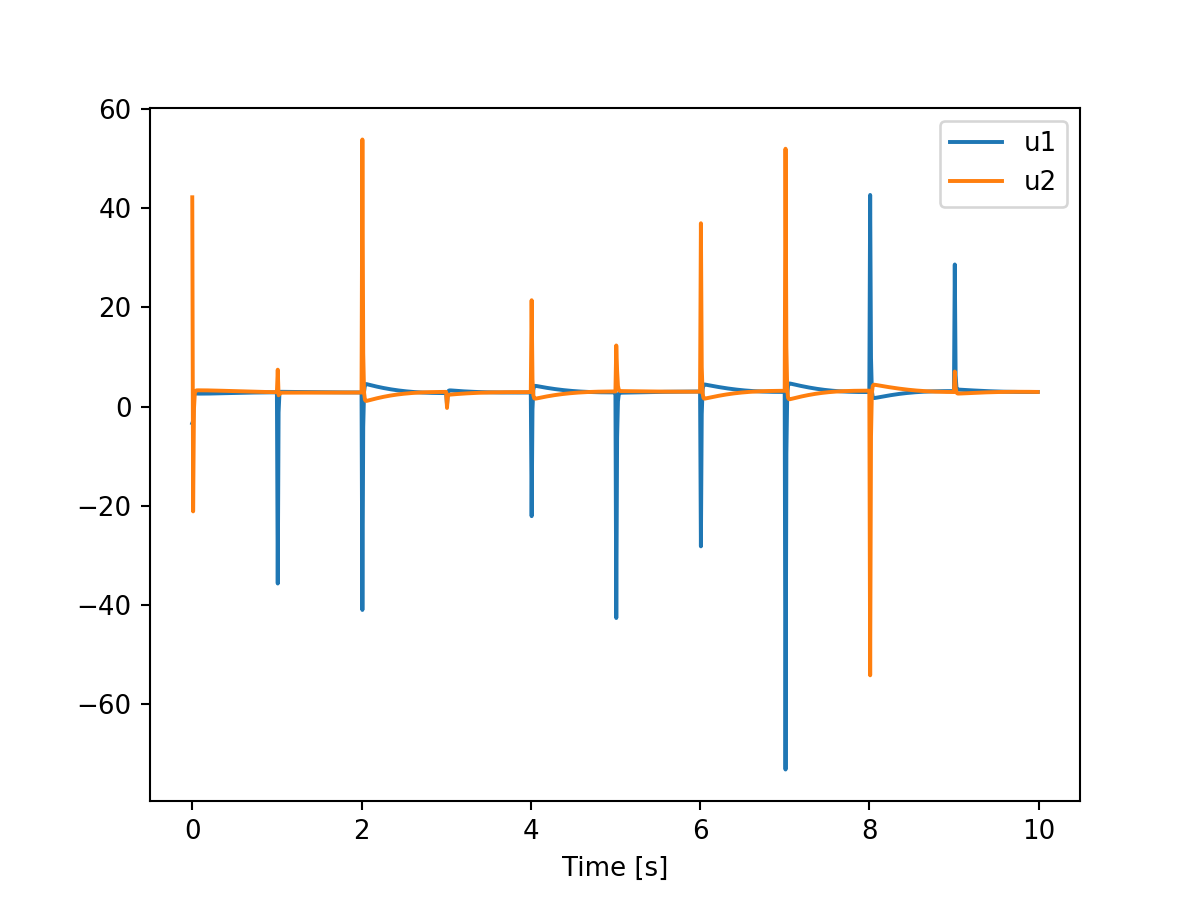

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAb6NtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EhlliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhmedEfUwaAQY0NNeI9N/r8O7WKv1d/gCdaAl
3Gi81o3z2y10tRWcIK0jjKBVUuThZ+QsHL0juuKYsYerxwqtDlxCDeItdrlLIe68DWXvwKOyDYHE
ScRYU8BCVbYG+CUL9LfBvAFLdMKsx8aFL0gHYcZ1oT+thVmulCoT81aUdXAvNWxJVeFoyHDIqUgd
hcLMjnuFJjpeTkAmyryQvcvS4V4TvwAHwmECX9e+JQ9/0Z+WAeGTsSiZtFgsgBlgUQBbpCIj0eR3
Drxa5PEex3LDD+XAg9NDsxW8cce2l/FR02IVTJaZmpZXtWQ5f3BP8Aty1kv38ceulQsVhdJje6g0
l0Bj6XmjYBLS5p2thXBovCDk56tcwW0pXAmn5ff2hXXmI5Gvc0rDaU9hZI3FzDNi13TNYmkSDf1S
KznomzDwO9GxtcvmIrqffe+QXHegiGfM63XtT7KB/QMexVdErDPgyaKkGf8V+NqvN+yY8/nsjf2E
Fx2m8yY4A20h/nzvxj0JGMLeHi7wr4sf7PBrPmO4yae5/KjSNEhiaznU538Udp/VNSV+3gxYuD9n
ZArTtqPvt4yLz39rF9EoPALtRWEN4d39oavGiY9uez7KFHOitwSyakb+PI3wpb5hosaHKRZsInzk
9Cff7PchFzeLIr7egISomBC9Ve2/Xsxynmmd1ENTAAADAAADAAADAAAE/htllAK04JF28bQCOngz
pQuNUKyt4D5BwwOk5Ie/w8MbGGo+4umc/7XN4xPgITX/v8P4xXK0cnPq8a36oAR/JNEM4+TBapX4
xj+b9wB+V8lwT3O2o56ISGYx3hiQiFC9I9bUAh+/4OliOWN8L6C7/VdZh6DY4QvaPAlCFTRG93VG
QdhJRQP/nWUaBT+q9NwS1xkVOEO5VE3j/5mYHg3MA7ERhmvAovQIhQIO2WQ0ZYKQmfQn8c6UMjwJ
s3aF94dpuhgNv05p8iZFN4bCV4sg4WZXfaTSQ1PNAL7TEkA1RBJAbRyVb3/8isQBpIT5oiDriXZK
Mf9SOmf57XmzKVEgHydyGAYiwNOAu2QDbDC2hmMAMef5U2T78u+ycS1SNKFJjMqZD01HIEL8A1gA
AAMAAAMAAAMAAAMAyDbHPTOu5UOUXIW3DenJ6QoPh8mkEFEMxGLjMOWMsBQaLHk0oVP9VylD1GgC
JwmzpOb8uwdVLv8ZlDL3raej2uyfQ+jK0F71qp+gbS+PBobfnjTzDNjlirXRXEqCT02CgX0WWUuZ
GTlDOLcp5XHgPkxhExtgqbXQCC2Sb0I04tgPgral+tXljut0JQ7N1xryPvM5Np7pwLjgXDTkIUB1
gg4qaqBXw7jbk4kVucDNwu1upiuE5VA0YyRpMTzQrMa24el/wslnakbWlHmHIp2E2avTVPPfCjmk
iA+mlPCH12L2ZsBL4Cuc93DAQi+dw3UCEdE2YMVriCNEOua41Z0yGwry1q15KWZCI3QFBl/gBCus
vG0oPcqwB+Y8Xm27Iq/7i12f5JiGmRij1CZVifvMYp/+l3pTuvcaYq8T7v4vf8d0BEs8zglbajCd
JLyqr535DN7N++DdPDWIktyYAoc/H4MIFgdTEVS+DTZbBhz8UjHZicB0ujngAAADAAipQAAAInym
CbJR7lePkViLON4RX/+mw/h/xU8Hy9eWh7e4AqirEmO73rFP/pnz48pZsD4VYJkx55enRD0hFS0U
9tNWin8rEmevunhreiYTGn7mKabRY0EW4KZ0OI3UpQih0tpCZlO5f37grO89nG7jIL2ChU9ZDpuT
kcjhzK/KxfuWhYO62onTSWGfwnFi1IWDGHHyRyG2bDCaiFQYlUxAVtC7U0tPWdKkZNWpuRhUbAjb
euxq7u9ZN4boLGAGYDBTTS6LKRGaZChsull//s49nooX0lZ3qASv4EN6YLGDmA+O5o9OzkU8FFt0
RXRdfbyZ1SxL6qxs1bv9HEc8wz2FdcYRr2Eu0VRsGcs8S1dDIFD7oxJjgwbmL0pTua2SnomuziCg
d59a3DOCeefPsTgTAFQwfU3HWCRlgNUBGY6fxNrt+Crzn8Jfupmb+oltwevTpg09w8NNO7jr+7If
vY8mPKnYF8MoFMV6Ww3TgK2MxNdqVUpjCCIRmP+n1VevT/2S2viVVkSQsDG09+Ey62GK3YtI8E0u
6Yu2R13YXtniJKhZL6qnigxFwb0X/K4pkA9aXC85GxDEOBhHWchNbGl4fGAWR7jze9zAdDOvvzBy
VNS7vIwsQIBiSVDLV3Ie1t0j2v0QS7gEBGE8XVnOwOWD0Wm+WWmSKARvEivB0t8+9bCAdjOEUioB
pYeOfew512Cs5I2ZIMTz7HtLWnMd5Ry2n/a6/84M1ByTfFDdx+NjOPcXOavmGwfhrgtIEjejCuS7
sHjn50EZZqX9CnUetACQ+V/F/wwGDaRh/K1ZolYRUMFGb6beP0WpQvRoRref1bU/MoeQLyNxZHQO
3GlZdss2DUNu/6gAAAMBOR90uNgSFP1A0bCj/QAAAwAAAwI0ir+GgCt1a0VnNYUax5zwsa0lBtJo
BiKUIeG1yRWwR3lLg/UR3ktzKZo0c5PjqpyDOnf2gm2AxliqAn1iusiXq/heoJjrwzWfMRTbhBdH
M4Bzx/LsPtfrIlScxoxdw

In [16]:
t, state, u = quadrotor.simulate(z0, part3_controller, horizon_length, disturbance = True)

plot_results(t, state, u)
quadrotor.animate_robot(state, u)


## Part 4 - iterative LQR
Now we would like to do more complicated motions with the robot, like a flip. In this case, we do not have a prescribed trajectory but we would like to compute a locally optimal trajectory while we optimize the controller. We will use the *iterative LQR* algorithm to solve this problem.
### Task 1 - reaching a vertical orientation
In the first task, we want the robot to reach a vertical orientation $\theta = \frac{\pi}{2}$ at the location $x=3$ and $y=3$ at time $t=5$ starting from $z_0=0$. During the rest of the motion, the robot should try and stay close to the origin. It should also try to keep its control $u$ close to the control needed to keep the robot at rest. We want to make sure the robot reaches the origin $z=0$ at the end of the movement. 
1. Find a time-varying cost function that promotes such a behavior (use only quadratic/linear terms for simplicity). Assume $T=10$ seconds.
2. Write a function ```compute_cost(z,u, horizon_length)``` that returns the cost of a trajectory z with control trajectory u (using the cost function you wrote in question 1).
3. Compute the quadratic approximation of your cost function along an arbitrary trajectory of states $z_n$ with control trajectory $u_n$ (this is not just your cost function!)
4. Write a function ```get_quadratic_approximation_cost(z, u, horizon_length)``` that returns the quadratic approximation (Hessian matrices and Jacobians) of the cost function when approximated along the trajectory z with control trajectory u.
5. Write the iLQR algorithm that solves the problem using the functions written above. DO NOT FORGET the line search step at each iteration. For the line search, start with $\alpha = 1.$ and decrease it by half when the cost does not improve (you can stop when $\alpha < 0.01$).
6. Test the algorithm using as initial guess $u$ such that the robot is at rest (using the results of Part 1.2). Analyze your results (probably you will need to "tune" your cost function), plot the initial and final state and control trajectories, show the animation. Use the simulation without perturbations for simplicity. 
7. What benefits and issues do you see with this approach?
### Task 2 - doing a full flip
In the second task, we want the robot to do a full flip, trying to reach the upside-down state $x=1.5$, $y=3$ and $\theta = \pi$ at $t=5$ and upright state $x=3$, $y=0$ and $\theta = 2\pi$ at $T=10$.
8. Use iLQR (and a new cost function) to get the quadrotor to perform the task. Analyze your results. 
9. What benefits and issues do you see with this approach? Could you run the resulting controller on a real robot?

In [17]:
print(horizon_length)

1000


In [153]:
#Task 1
deltaT = 0.01

cost_Q_mat_1 = np.array([[1000,0,0,0,0,0],
                      [0,10,0,0,0,0],
                      [0,0,1000,0,0,0],
                      [0,0,0,10,0,0],
                      [0,0,0,0,1000,0],
                      [0,0,0,0,0,100]])
cost_R_mat_1 = 5 * np.array([[1, 0],
                      [0, 1]])

cost_Q_mat_2 = 1 * np.array([[1000,0,0,0,0,0],
                      [0,1000,0,0,0,0],
                      [0,0,1000,0,0,0],
                      [0,0,0,1000,0,0],
                      [0,0,0,0,1000,0],
                      [0,0,0,0,0,1000]])
cost_R_mat_2 = np.array([[1, 0],
                      [0, 1]])

cost_Q_mat_N = np.array([[1000,0,0,0,0,0],
                      [0,1000,0,0,0,0],
                      [0,0,1000,0,0,0],
                      [0,0,0,1000,0,0],
                      [0,0,0,0,1000,0],
                      [0,0,0,0,0,1000]])

z_goal_1 = np.array([3, 0, 3, 0, np.pi / 2, 0])
z_goal_2 = np.zeros([quadrotor.NUMBER_STATES,])


In [157]:
def compute_cost(z, u, horizon_length): # z = 1001, u = 1000
    total_cost = 0
    
    for i in range(horizon_length):
        if i < horizon_length / 2:
            total_cost = total_cost + 0.5 * (z[i] - z_goal_1).transpose().dot(cost_Q_mat_1).dot(z[i] - z_goal_1) + 0.5 * (u[i]).transpose().dot(cost_R_mat_1).dot(u[i])
        else:
            total_cost = total_cost + 0.5 * (z[i] - z_goal_2).transpose().dot(cost_Q_mat_2).dot(z[i] - z_goal_2) + 0.5 * (u[i]).transpose().dot(cost_R_mat_2).dot(u[i])
    
    
    total_cost = total_cost + 0.5 * (z[-1] - z_goal_2).transpose().dot(cost_Q_mat_N).dot(z[-1] - z_goal_2)
    return total_cost

def get_quadratic_approximation_cost(z, u, horizon_length): # z = 1001, u = 1000, hl = 1000
    list_of_Q_mats = [] # len = 1000
    list_of_R_mats = [] # len = 1000
    list_of_q_mats = [] # len = 1000
    list_of_r_mats = [] # len = 1000
    
    for i in range(horizon_length):
        if i < horizon_length / 2:
            Q = cost_Q_mat_1
            R = cost_R_mat_1
            q = Q.dot(z[i] - z_goal_1)
            r = R.dot(u[i])
        else:
            Q = cost_Q_mat_2
            R = cost_R_mat_2
            q = Q.dot(z[i] - z_goal_2)
            r = R.dot(u[i])
        
        list_of_Q_mats.append(Q)
        list_of_R_mats.append(R)
        list_of_q_mats.append(q)
        list_of_r_mats.append(r)
        
    QN = cost_Q_mat_N
    qN = QN.dot(z[-1] - z_goal_2)
    return list_of_Q_mats, list_of_R_mats, list_of_q_mats, list_of_r_mats, QN, qN

def update_system_state_new_control_forces(z0, u):
    list_of_z = [z0]
    horizon_length = len(u)
    
    for i in range(horizon_length):
        current_state = list_of_z[i]
        next_state = quadrotor.get_next_state(current_state, u[i])
        list_of_z.append(next_state)
        
    return list_of_z
    
    
def solve_iLQR(z_0, horizon_length): #  hl = 1000 # u*
    # initial guess of u_star
    u_optimal = []
    for i in range(horizon_length):
        u_optimal.append(0.5 * quadrotor.MASS * quadrotor.GRAVITY * np.ones(2,))
    
    line_search_times = 0
    
    for _ in range(50): # iLQR iterations
        # get the current guess of z* based on current optimal control
        z_optimal = update_system_state_new_control_forces(z_0, u_optimal) # z*
        
        # record the current cost
        J_cost_old = compute_cost(z_optimal, u_optimal, horizon_length)
        J_cost_new = 0
        
        # get Q,R,q,r by quadratic approximation at (z*, u*)
        Q_mats, R_mats, q_mats, r_mats, QN, qN = get_quadratic_approximation_cost(z_optimal, u_optimal, horizon_length)
        
        # reverse Q, R, q, r in N-1, ..., 1, 0 order
        Q_mats.reverse()
        R_mats.reverse()
        q_mats.reverse()
        r_mats.reverse()
        
        # get A, B by linearization at (z*, u*)
        A_mats = []
        B_mats = []
    
        for i in range(horizon_length):
            A, B = get_linearization(z_optimal[i], u_optimal[i])
            A_mats.append(A)
            B_mats.append(B)
        # reverse A, B in N-1, ..., 1, 0 order
        A_mats.reverse()
        B_mats.reverse()
        
        # Riccati recursion, using A, B, Q, R, q, r
        N = horizon_length
        K_gains = []  # K_i
        list_of_P = [QN]  # P_i and P_N

        k_feedforward = []  # k_i
        list_of_p = [qN]  # p_i
        
        for i in range(N):
            A = A_mats[i] # A_i
            B = B_mats[i] # B_i
            Q = Q_mats[i] # Q_i
            R = R_mats[i] # R_i
            q = q_mats[i] # q_i
            r = r_mats[i] # r_i
            
            P_prev = list_of_P[i] # P_{i+1}
            p_prev = list_of_p[i] # p_{i+1}
            
            
            K_i = -1 * np.linalg.inv(R + B.transpose().dot(P_prev).dot(B)).dot(B.transpose()).dot(P_prev).dot(A) 

            P_i = Q + A.transpose().dot(P_prev).dot(A) + A.transpose().dot(P_prev).dot(B).dot(K_i)

            k_i = -1 * np.linalg.inv(R + B.transpose().dot(P_prev).dot(B)).dot((B.transpose().dot(p_prev) + r))

            p_i = q + A.transpose().dot(p_prev) + A.transpose().dot(P_prev).dot(B).dot(k_i)

            K_gains.append(K_i)
            list_of_P.append(P_i)
            k_feedforward.append(k_i)
            list_of_p.append(p_i)
        
        # reorder K, k in 0, 1, ... , N - 1 order
        K_gains.reverse()
        k_feedforward.reverse()
        
        # Forward process, calculate new control forces using K, k
        alpha = 1.0
        current_u = []
        current_z = [z_0]
        for i in range(horizon_length):
            K = K_gains[i]
            k = k_feedforward[i]
            current_state = current_z[i]
            u_i = u_optimal[i] + K.dot(current_state - z_optimal[i]) + alpha * k # u_i = u* + K(z - z*) + \alpha * k
            current_u.append(u_i)
            
            next_state = quadrotor.get_next_state(current_state, u_i)
            current_z.append(next_state)
        
        J_cost_new = compute_cost(current_z, current_u, horizon_length)
        
        #line search process
        while (J_cost_new > J_cost_old and alpha > 0.01):
            line_search_times = line_search_times + 1
            # decrease alpha, calc new control forces
            alpha = alpha / 2
            current_u = []
            current_z = [z_0]
            for i in range(horizon_length):
                K = K_gains[i]
                k = k_feedforward[i]
                current_state = current_z[i]
                u_i = u_optimal[i] + K.dot(current_state - z_optimal[i]) + alpha * k # u_i = u* + K(z - z*) + \alpha * k
                current_u.append(u_i)

                next_state = quadrotor.get_next_state(current_state, u_i)
                current_z.append(next_state)

            J_cost_new = compute_cost(current_z, current_u, horizon_length)
            
        # After line-search, store the optimal control result
#         print("J_cost_old is: ", J_cost_old)
#         print("J_cost_new is: ", J_cost_new)
        u_optimal = current_u
              
    print("line_search_times is: ", line_search_times)
    return u_optimal


line_search_times is:  5
u_optimal_part4_task1[0] is: [64.6630186  31.69917246]
u_optimal_part4_task1[100] is: [9.3106548  7.06444905]
u_optimal_part4_task1[200] is: [11.14648941  7.55045475]


<IPython.core.display.Javascript object>


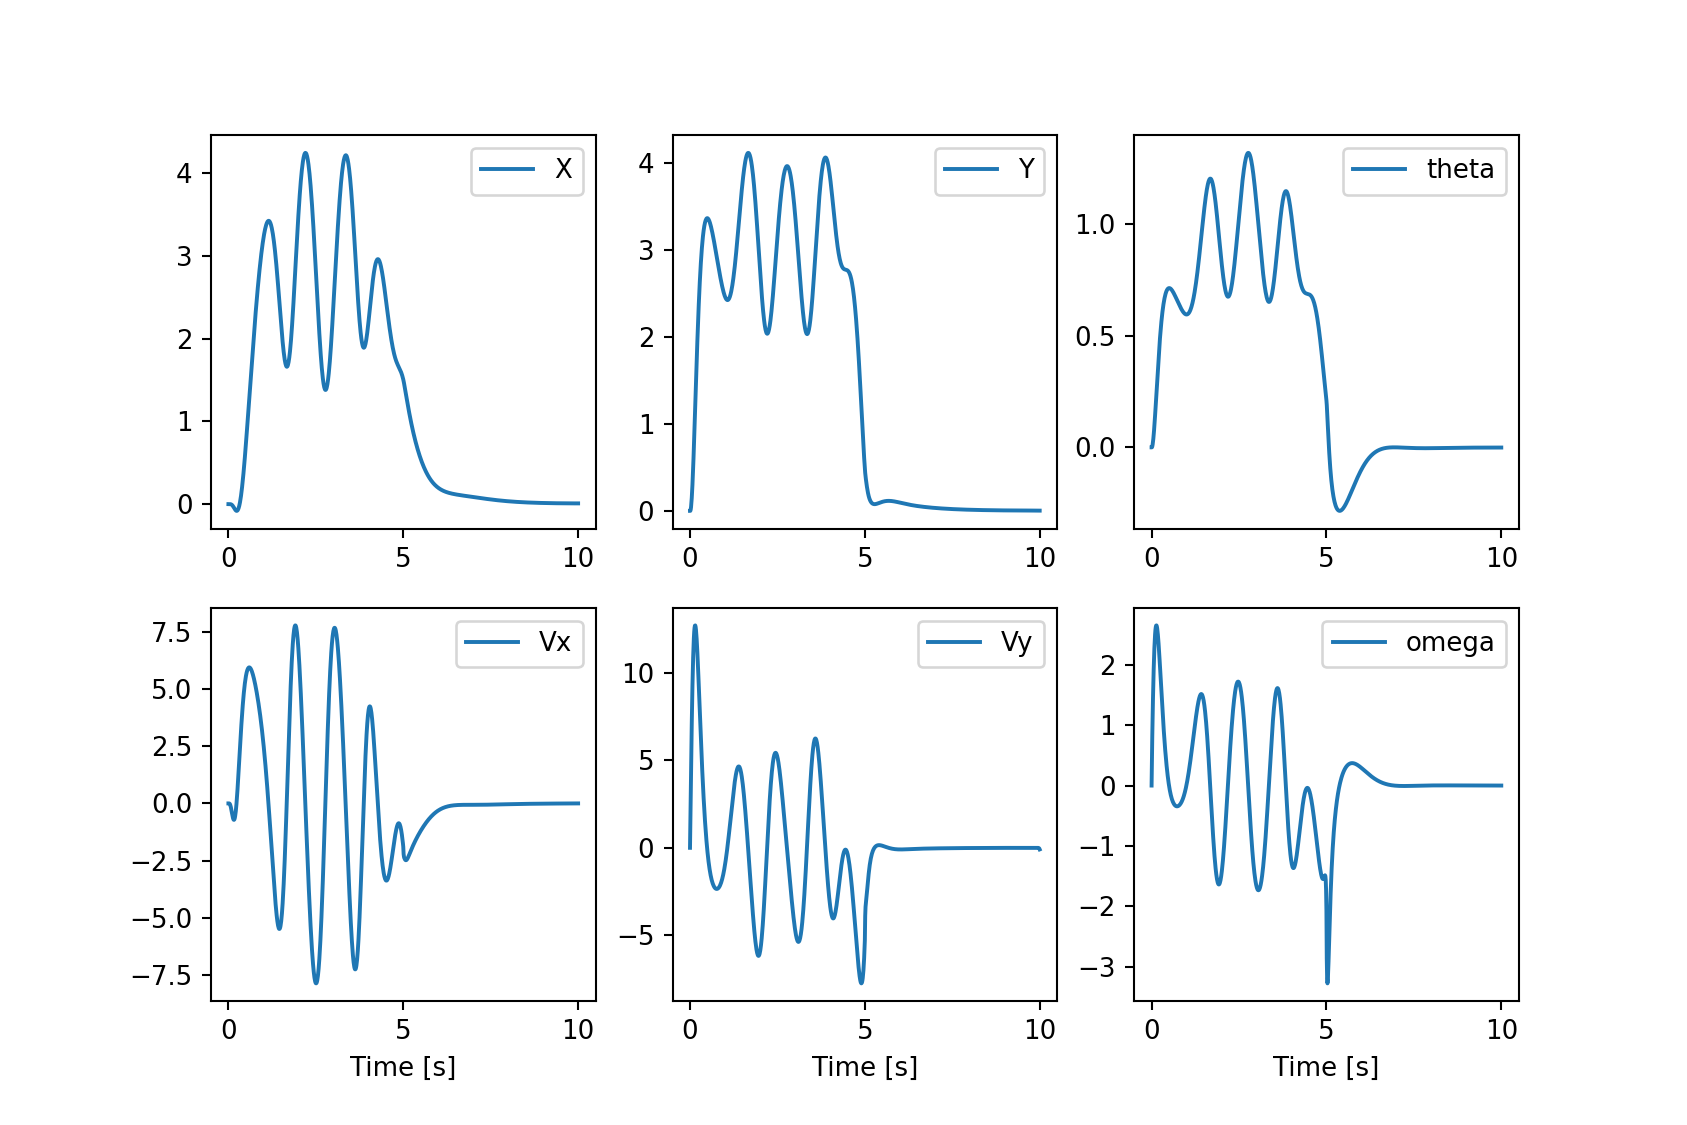

<IPython.core.display.Javascript object>


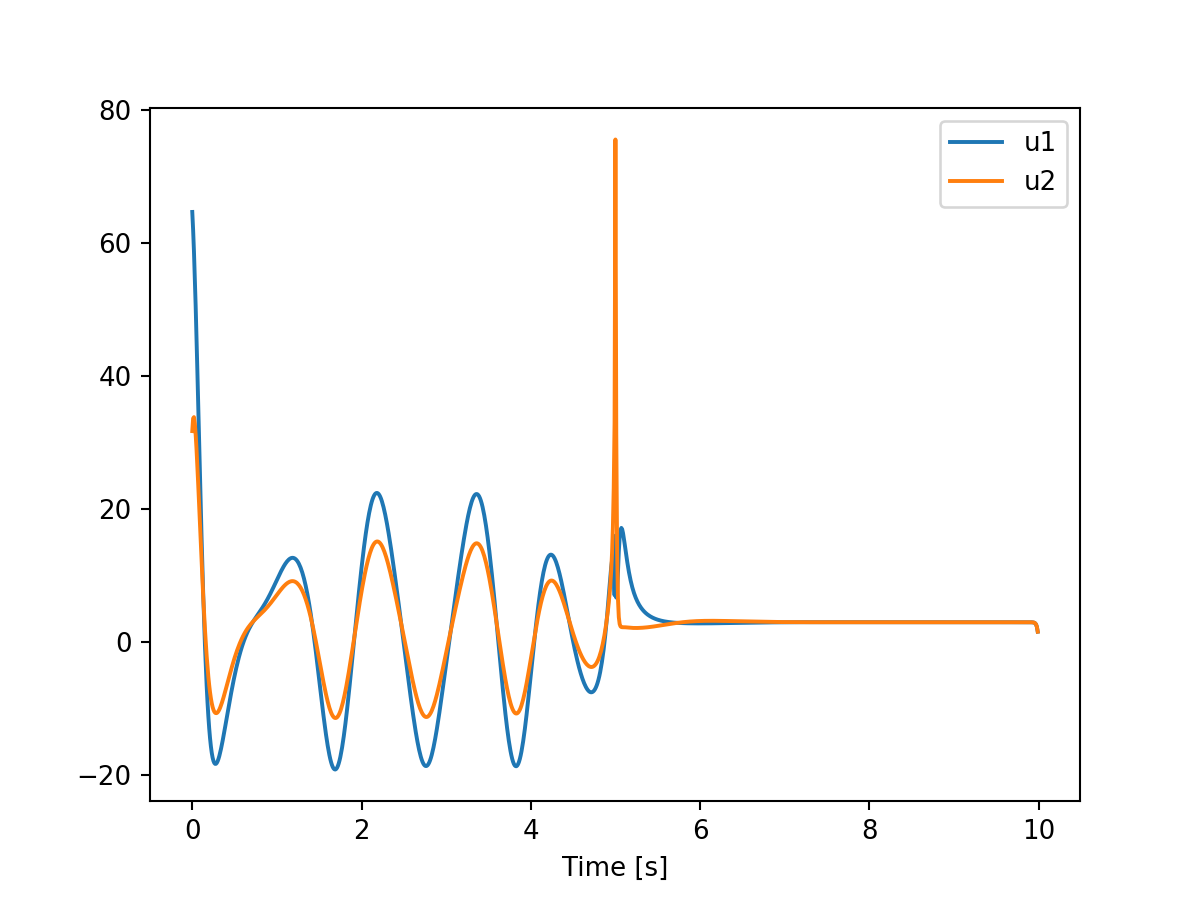

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAoN9tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EspliIQAN//+9vD+BTY7mNCXEc3onTNPQwHn9M49QHB2AAADAAADAAADAAAfGGg/Gbu1YcMQAAAD
ABMAAwQBsAGYAjuAJMMT9Z4AHUK0N+p1pXE2OiCkGhD6azaJawFu/UpMcwzmbjGvg1gUW4YAybik
ZbNcIWssfDlD/eezjIEwT/fsP+u6IUqmKWG040K/IXjl21kyKX9TiFgY0i925el6Q7OcbSyku9/x
3df7GDd9evMekCyhFlN7y6/B7KkC0h16UuP6fqxBsEslxHyZvnA22ndJFOqr5gxDViYWlj+3E60B
JugtQEpkCAj2yxOTYIK0RgiBUGRQqI3IfJaYZjFnAzOB6wS14XX4p7owONGE8FKZrEXWPvyLuBod
ZRrI5yKHP7OjCPafICAdGyEZPQuEA70YKm7mCP1mIeLXaDRbpmRgCWVEOizpizrBUPiF3objfrdH
FklYRkeA7wBEdTd7dazZ8omjiL5kWPh5n26RcZI8bVy7SYJMKOe4kHerOAXmkTQx1igABCdfjrWy
i+sbgADal8BzCX4Lza9bJsalRxIS/6UJ+daVWkXko3A64GPcL/qyvFsb+Dklpmalle1ZAfcch/gF
uWsl+/jj10FkSsLpMb3UGkubT/UMO6isi8HZSAntqqSUhOerXMFtKJg0TgNarfGlPw/A+osJ2UYg
RS4konDt4Fj15QKFjPQeDKNoWWGv8bnkN5+QvxDWg7eI4bfH7pdT3ZT/F4BrV0RlKwy0KdU8g7sh
ba1P2UXd89kb+wguO04tuUGfvHz+9HRHHroxDEZspGXGaf88aQw9aMG0J1XJ3ZVRSCPowAHLc7du
sklzULvMwZ8OQYgKE48+BtsRbab5TJkBoAd273dqYfvvAGNbTxxQCbbrWulcxlo61oGEJ9te7BEl
+hXEttzc5SG93mf9eFGV/5BXisInSngQTXuN0fLLCLI6OdmGY8aje/48McXQ1gARUxNyL9IaJMsa
joAAF2Feetzs9bz9GrdxZj6J3y1kus1KMoFC/PVFqdVLp98ccBdRUsPEbFk2lKIN7X9NZIdUXmas
gmX4FWRJqHqmlOVGwABPoyWABUKfq1kq/Mn5HqNbFQ5EIovu+LCOmx+sseh9HdnNLaCAP8PDGxhq
rnpdelqY0SW6XEHDDYykTTZMdqSldJwCxwHPES4Q8gvLbImGKf/s1pRZ+AeWJAU56cJSA/BFS5i2
Hd9q626xDnrP3/B0sRyxvhe+K/9wmStnCxqfrneQHtGVRDbHGdHBhXs8r7fV6/69NYR9wVx01oVP
jR4eP/mZgeDcwCpWXEmuyIvSltwEVa+9j7pgwmHCSy50oZHgTZu1YDmmDGuFcdzF34teAjxiNx/Q
TlF1M61akSgyTke3+H62DtbIbo8e9r6zLEaFKyEMXcyFSE9r/7AbIhph39QWPedSk5CNI+PIphnI
XUNq8JSYzoSf3z36hUvKbm937RyZxJ1G5DTbfIkoodamM9Dd+PFx2yGl9KLmtHeP2DpgDhYieGgA
5loRim3v3rtJwrPqtPJn+E0q/N8CJnwehntUACvfMDlLAtK+302qtbVEQAGvwfBc15syqqHgAAPS
TdGikRIAAbzcBazZySuxpi/Zk0/8SIF+T2QUl/GXECHwPjl4vflRN6KSEYnQ2WqLIvPWlzGd6aid
X2rmbFChW9ECDLz+vImjKSGjI4cnJIpzKIh1NLU7nRnOJ7CH9767Y1Ho+ilEGjFb2XJdXVWSYOMd
uHW4nRCLc2MYUKPsqNn/iRGgMQSd8sLmShvMkpSEWZWvVXK3+t1uhKHZuuDogB7qg2OrOBXztfH5
gd+EbmAO3cREHvudiM+lq8QSjsiCHDQOa+HZORhKlCaAe5M0Ixi1+n9UZF0D6YMox4kp835fIAU5
l891D04REDX5giHsLforpNyB90TAIN8NspjdXfZMLbHuZ+VP9OYFI0tXp+WsbJEhTI59mBay46MA
uiMKxokt5EomKGgHwgcFKd6h3gzVFL4CmDsZuF/pUTZgxWt4F6l/tlRUwSUN1dySLSfyM85hJRyc
GxI/ECqBWWkvfh8VKeQSPyV+vbAAqiC+303L+9lKMXsklIC6IaOG1wvRkp3ZPdS8xu5iAxLBEp8+
8HCpZlkTPGhLnoaBjUKvPFteeZAdZg7lyUyeccVAIitG954su6Cu3A6G2pKVgh+8FAz6Y+R5jDBk
AAAJ2JRao0LAx2oC76vkUHAdTel94ADq0zsXhr2eib6i7LnyC9KUAPOOdqiJl4gXAR0comQy5JmA
QnKmYEi50LYbL43qXsxdh8qkQtrf3PEY3mc5WX/wTXKrj1tbaSvXHuXcwkgJokH5Eg6hmNQM7Ozx
nUEB2M1R6mO7CMObWXcOgIB7Vb3K0bgRntPPg5cdkX+RSDZK+007lpIamNYZKprpRwrqNx1kilar
+tr6qlf0x4xVKdrOlPDMk6yPljLAjbex+Ct9+2EUumCxgBmAwU00udybmj2Hzy9L1Jz6hT83iFnl
648fSLK2YnI+41JTvdj4UmYXg+FRdSafkwHNR8e3aD7RvPFyFlLo1640bdbcPsZKefAyUX44k+01
4wn/Fbr4Gzgij4fd1Ms41zoz5GX44VvvspF+vE+Vao4MaU0yl+RcpyX7yXI8Y01D8YI/HU9hsmDY
UhYVlsJs5bPC8E/d27JVaCQ5DOAdLM34SRblFhMrPz7qWGsbBTXjjVT1QdA+4h/3ThvAch5dUXwM
OcsAAOmCLOOGRTehNaDkRE3zYSyRlHn+O/dLQx2sIkBG0mgORxTaGoQQc/TJRgap/G7isZLB1eKy
2MUXoTSACJLuPK4923N7uD3OM+SIoZL7pkBhlm8omVAWYgLyFUWTr8iJ3RAzKin63jMkGJ59j2M2
Ti27aN3UPvyf+S9tk9jCs

In [154]:
z0 = np.zeros([quadrotor.NUMBER_STATES,])
u_optimal_part4_task1 = solve_iLQR(z0, horizon_length)

print("u_optimal_part4_task1[0] is:", u_optimal_part4_task1[0])
print("u_optimal_part4_task1[100] is:", u_optimal_part4_task1[100])
print("u_optimal_part4_task1[200] is:", u_optimal_part4_task1[200])

def part4_controller(state, i):
    return u_optimal_part4_task1[i]

t, state, u = quadrotor.simulate(z0, part4_controller, horizon_length, disturbance = False)

plot_results(t, state, u)
quadrotor.animate_robot(state, u)


line_search_times is:  44


<IPython.core.display.Javascript object>


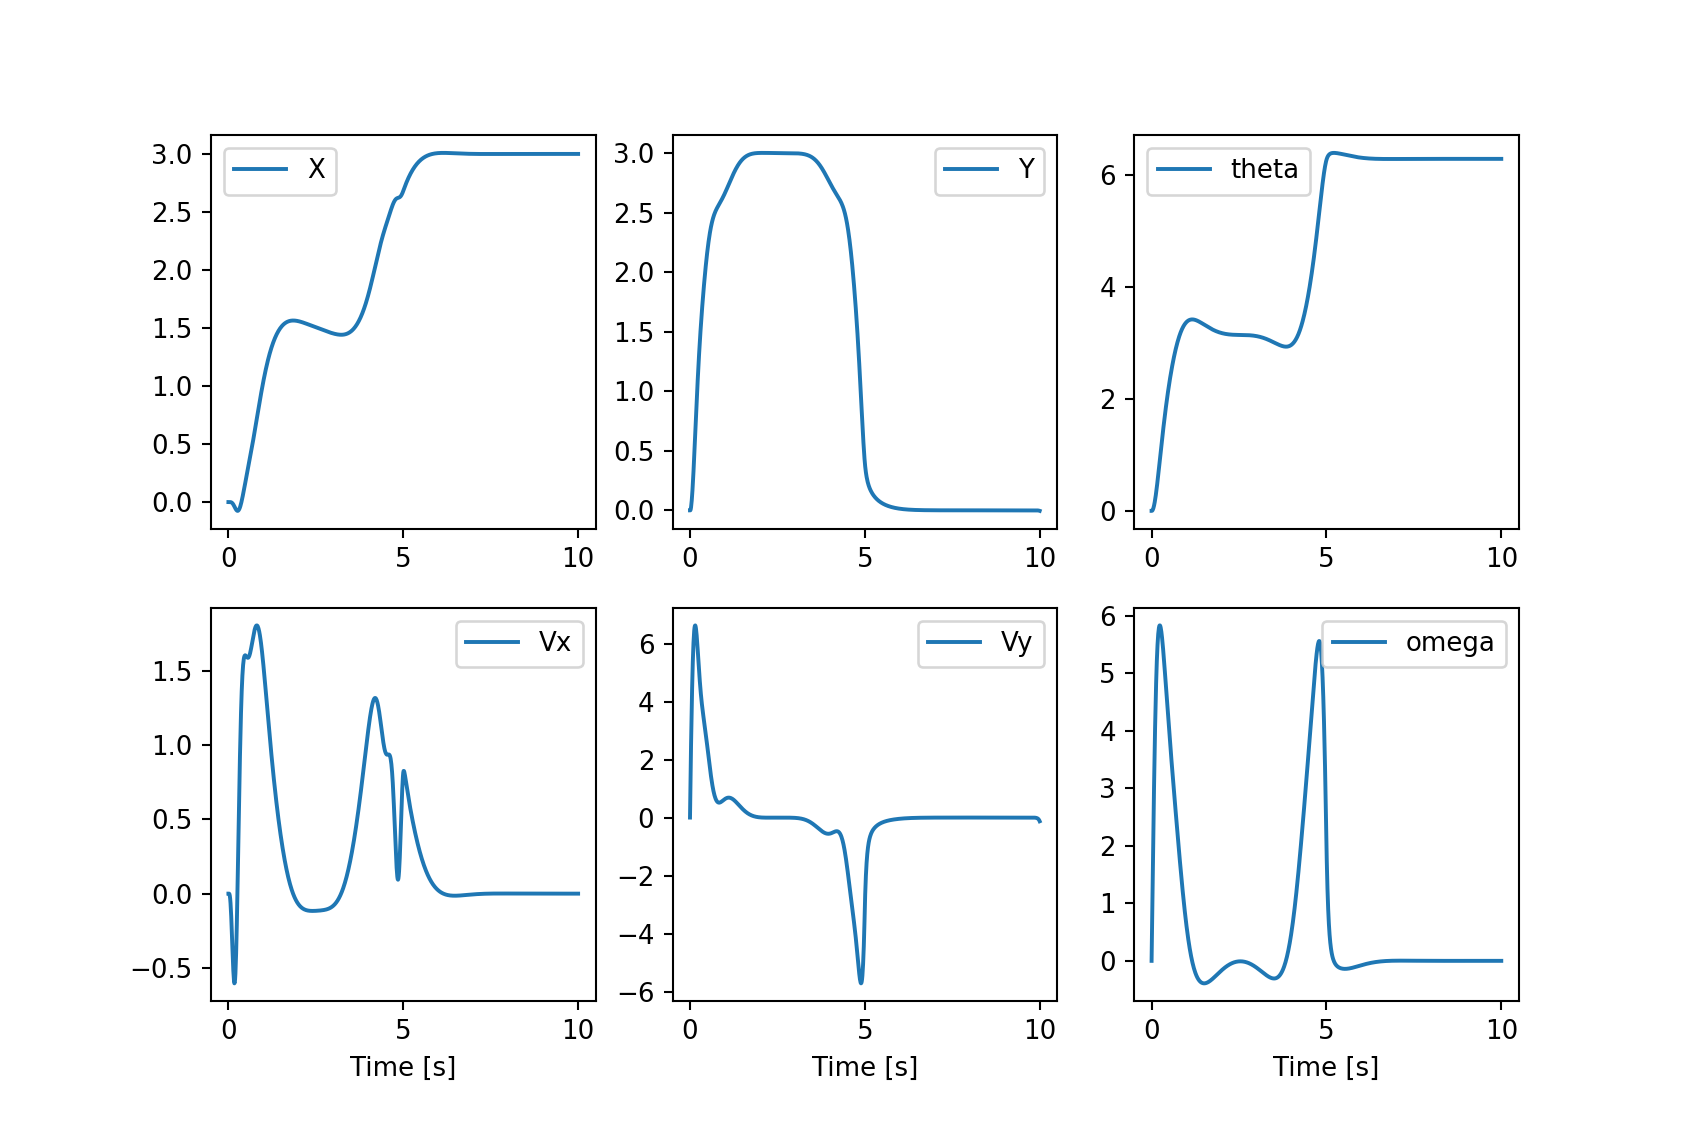

<IPython.core.display.Javascript object>


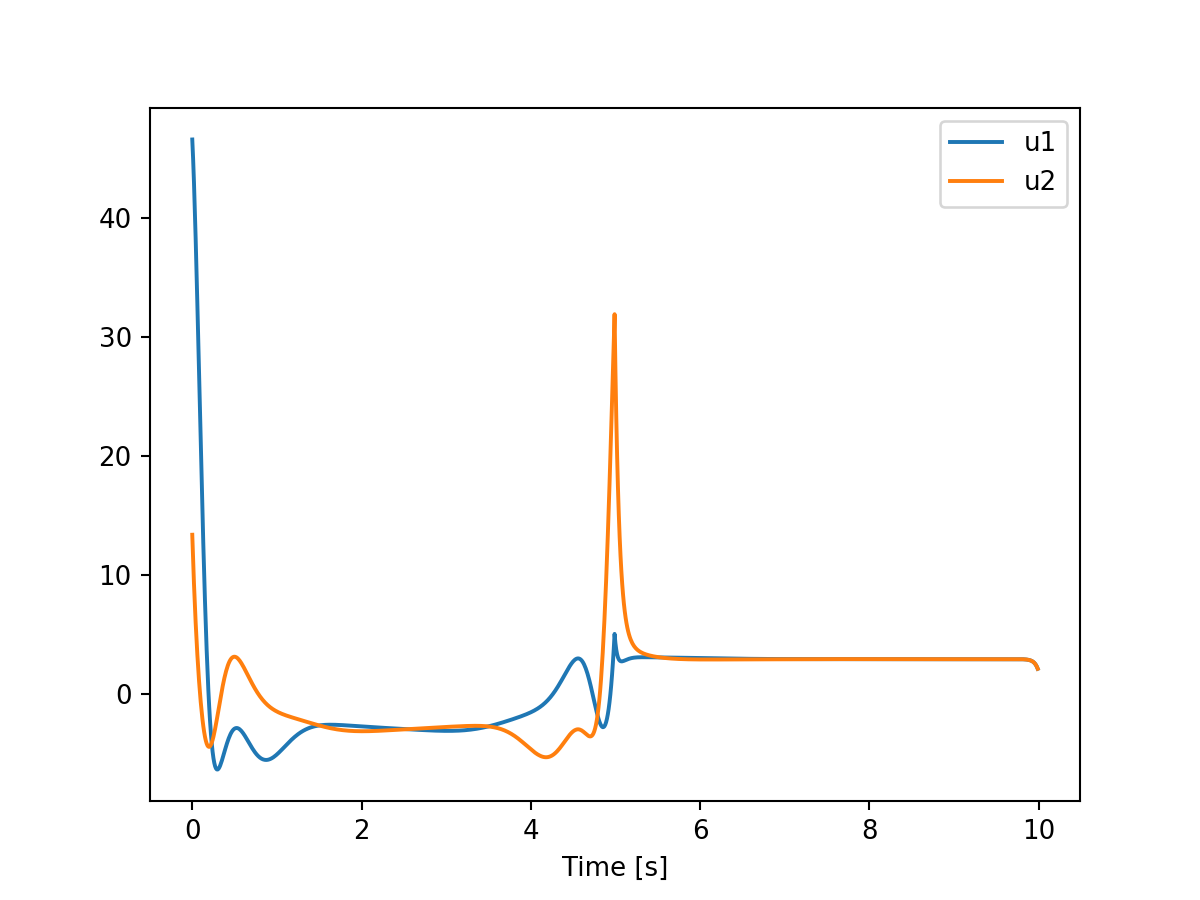

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAZrttZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EkxliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhoQZvIVAmDgcDuo5PlWD03+vw7tYq99Z+y+b
HyReNFrxo3z2EA4QBJsEFaRxlAqjSg1ElkVWMl5YHFMWMPV44U8/r8e+gYHGjCeClaVZ8BH4FG6Z
WgkicRT6ihsKd1pWWQToCa1wYUa6WxZj1tesogdhxnWhP62FWa6UKhPzVpQlcC8xbElV4WjIcMip
SB2FwsyOe4PjiDFmgCYqvBesO45CMv+ngu8znmfi+LrtH5kvrAP7J2hRM2iwfoA4AKIAt0hER6PI
7h14tcniPY7lhh/LgQemh2YreOOPbS/io6bEKpktMzUsr2rIcv7gn+AW5ayX7+OPXSoWKwukxvdQ
aS6Ax9LzRsAlpc07Wwrg0XhByc9WuYLaUrgTT8vv7QrrzEcjXy6VhtKewskbi5hmxa7pmsTSJBv6
pFZz0TZh4HejY2uXzEVovxVhBJMd9z3rmdbr2p9lA/oGPYquiVhfal8cV+dgrp+j6v3G+eyN/YQX
Hab8mXCoFpd/kOojj0FmnpGa6jeO1ocSaUBGljuMnJIyf5F7W65BxET6b0NSc0mzAIN1vlJ4Od4I
6WDK3haaO1P9/O1YLns710KLweAXOnyFXw7u/DcfVUjzyIGEc9edFbgl3RcLDHod5yDRTzIoZa26
Vcm17CKH/tGmEXN4vfCix03JOAUaq7t+vZjlPP1C3qnHQAAAAwAAAwAAAwAGj9tllAK+2mnil7QC
OngzpQuNUKyt4D4BwwOk5Ie/w8MbGGne4umc/7XN5uMqcVJ/v8P4xXK0QnPq8a36oAR/JNEM4+ks
/2RT/9mtKLPwDyxGmzXQToppnGYx3hiQiFC9I9bjU7i3bvQyuRreAxen/qvNA3L/A2W4+nTwJSch
mzwOU7CSigf/Oso0C78H3Or9+KxU4Qnr6TeP/mZgeDcwD7lYia8OIbTwuA1lJSGi/qd7Qil/jnSh
keBNm7QzN7wgjPzYJsB60s7AdO0fjgr0+Gc/LW4XI/d8CK0P5rEQtfU6PuXl6T/hKRIC76b/WWIb
XyvusL4zrm/oKRAgB8pLWLYANn8V6VWTSIaau2l7Yjy/4ixf5qJaBB5QbkH6RfzSQ2/+XolxWnZJ
pzfRMSzbbkQKFKGkMXv/Zu6/CTo3qSvB5eE/n4TvfoPHE6E2RAYAC5DemRpx+N3yrJlZ6Qchq0MD
uTMkYdw3Bfp4ABbSVIfyvb9s/I4nJxU/udqkAABUS4ByTQE9SeeX+ibgbwkRSd1kRnXcRSPl7xbd
s8mVYCppMZhHPTGL/FjyaUKn6e5XSUe0BR6zZzYtpGRhVLvzwUuuAxjQfnqq/h2rw/0Gtm0W8FsD
xS9S01WEgo37HLBD8e2YkRPppGZBIgspcyMmuPFuZZ4wXbFdRhExtgnPxjqCyVCSHhAPgTQlbXrJ
w6c4xTSzhD9Ig5H3mcl+Yq3CgK52ote7XlMsSC6qRB77jTs/S1eIJR2RBDhn6FjKZOTKtvSokQt3
jGlYQNeL0CnFsTOj2KC3JtqJ0KGpaHtJMq66TzqHHMbL3tlEli5uZM58VWlbZn4vfFQTKm1v6Z/L
f9iTelz/8LBP5vs+5Gh+p23zjuVseabOpYpQ9IA58AHUD9dEQ7cJo8x1yBxdu9Z7EO8jS80Tte5G
+dEwTzf8hURAAHkZB+NJoLHeToQiAHWsbx5DOatJYSG0LDjPK8dk5DP6d7X5ORNroVmbWcyX/3/e
B4X8B+hbajCdJLxrIXr5Dqs7JnPuihbAah3TmXKhXttTnYs31SQmQ5uSAOcdsBjk9N1egqAAAAMD
1qGX8rF9x5UBYIIremN1aKWTDIJNXejcLGUWmd8UpSWe6AH91Mye16nNn7JKeYRkOO1yDe1x7niM
cTeT+2P5VpFrzdV7fUSG8YOjwTnoNWBDI5kQLS1in8l+8ZbT5rWmIhe7TUlsmC7h0A2+t3U9ZDpu
TkcjhzK/LsPd9CmO/yBFyf8UfKNWLUhYMYcfG4KLZsMJqIhqFSzGBW0LtTS09Z0qMDTvtS4oUkDC
FnuqwuzMHeoi9FBb34DBTTS552OaPYdkuEogsv5m2w4hWM2SjT0lIRGG8fcakp3V5p8VjQ+KmxRL
j0C1M2X4TrB0IGlck58LElISFyp+NRD7GTLweCyOZgKPp0O17oHv0H/E8NjbALVWe4wKF5CACXJw
aNpxqIpcx/hyW+MdplNNt5iMjPZUryL1yzlbuZ5cpGXpJufgczBwgsBLPK7o4p5diBvnoy7OnASq
ZrXmZHjVtBnrHmo6DOD1B531v5pH1tXfgqjxCD9EX3d6UYf7LuHmoreHX5059WJkQ/7jobnSTvBM
m6w0fKUpkxrX3zvrF1GWqjG4PautC64taavT0iBd/2U0exbihW1P2ShvXAPWQhgLKvgLlZE3koX4
RFDEgjqUENmuwES3BGmxf0mcP7q9qgOiecPsaAkAm+gfV9eeUlOVMk/sQ9/kt/+pOGG42/1N/Nww
htwDXNbUK13q4oqqZUqBzTZdLvEnMZ8i+B4DfoY9YPyn0EJNnIdNrpM/S4F4piQH1tqQb83J25O5
Sk3kseYDkAIAAGBqeMQFW6RnXOJzT9bAAAADAABLkWf7Ay3lqy9HZ1Z1B/D/p5pJ1EHDAkwW0JXv
XEAWZWNPE6Mh0R0W+s9qH

In [159]:
#Task 2

# Need a new goal, new cost function, new quadratic approx
cost_Q_mat_1 = np.array([[100,0,0,0,0,0],
                      [0,10,0,0,0,0],
                      [0,0,100,0,0,0],
                      [0,0,0,10,0,0],
                      [0,0,0,0,100,0],
                      [0,0,0,0,0,10]])
cost_R_mat_1 = np.array([[1, 0],
                      [0, 1]])

cost_Q_mat_2 = np.array([[1000,0,0,0,0,0],
                      [0,100,0,0,0,0],
                      [0,0,1000,0,0,0],
                      [0,0,0,100,0,0],
                      [0,0,0,0,1000,0],
                      [0,0,0,0,0,100]])
cost_R_mat_2 = np.array([[1, 0],
                      [0, 1]])

cost_Q_mat_N = np.array([[1000,0,0,0,0,0],
                      [0,1000,0,0,0,0],
                      [0,0,1000,0,0,0],
                      [0,0,0,1000,0,0],
                      [0,0,0,0,1000,0],
                      [0,0,0,0,0,1000]])

z_goal_1 = np.array([1.5, 0, 3, 0, np.pi, 0])
z_goal_2 = np.array([3, 0, 0, 0, 2 * np.pi, 0])


z0 = np.zeros([quadrotor.NUMBER_STATES,])
u_optimal_part4_task2 = solve_iLQR(z0, horizon_length)

def part4_controller_task_2(state, i):
    return u_optimal_part4_task2[i]

t, state, u = quadrotor.simulate(z0, part4_controller_task_2, horizon_length, disturbance = False)

plot_results(t, state, u)
quadrotor.animate_robot(state, u)